In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import time
import itertools
# %matplotlib notebook
%matplotlib inline

In [2]:
def plot_path(dist_matrix, coords, route):
    plt.figure(figsize=(12,8))
    fig, ax = plt.subplots(figsize=(12,8))

    plt.plot(coords[:, 0], coords[:, 1], 'o')
    n = len(route)
    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                 (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                 '%d' % dist_matrix[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[route[0], 0]],
        [coords[route[-1], 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[route[0], 0])/2 + 6,
             (coords[route[-1], 1] + coords[route[0], 1])/2 + 6,
             '%d' % dist_matrix[route[-1], 0], fontdict={'weight':'normal', 'size':7})

    plt.title('Solution')

    plt.show()

In [3]:
def tsp_objective_function(Distance_matrix, p):
    s = 0.0
    n = len(p)
    for i in range(n):
        s += Distance_matrix[p[i-1], p[i]]
    return s

In [4]:
def PMX(P1, P2):
    x = np.random.choice(range(P1.shape[0]), size=2, replace=False)
    a, b = x.min(), x.max()
    x = np.random.choice(range(3), size=1, replace=False)
    if x == 0:
        b, a = a, 0
    elif x == 2:
        a, b = b, P1.shape[0]
    O1 = P1.copy()
    O2 = P2.copy()
    O1[a:b] = P2[a:b]
    O2[a:b] = P1[a:b]
    dict_P1_to_P2 = {P1[i]:P2[i] for i in range(a, b)}
    dict_P2_to_P1 = {P2[i]:P1[i] for i in range(a, b)}
    for i in range(0, a):
        while O1[i] in dict_P2_to_P1:
            O1[i] = dict_P2_to_P1[O1[i]]
        while O2[i] in dict_P1_to_P2:
            O2[i] = dict_P1_to_P2[O2[i]]
    for i in range(b, P1.shape[0]):
        while O1[i] in dict_P2_to_P1:
            O1[i] = dict_P2_to_P1[O1[i]]
        while O2[i] in dict_P1_to_P2:
            O2[i] = dict_P1_to_P2[O2[i]]
    return O1, O2

In [5]:
def reverse_sequence_mutation(p):
    a = np.random.choice(p.shape[0], 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [6]:
def transpose_mutation(p):
    a, b = np.random.choice(range(p.shape[0]), size=2, replace=False)
    q = p.copy()
    x = q[a]
    q[a] = q[b]
    q[b] = x
    return q

In [7]:
def kroA100():
    coords_string = """1 1380 939
    2 2848 96
    3 3510 1671
    4 457 334
    5 3888 666
    6 984 965
    7 2721 1482
    8 1286 525
    9 2716 1432
    10 738 1325
    11 1251 1832
    12 2728 1698
    13 3815 169
    14 3683 1533
    15 1247 1945
    16 123 862
    17 1234 1946
    18 252 1240
    19 611 673
    20 2576 1676
    21 928 1700
    22 53 857
    23 1807 1711
    24 274 1420
    25 2574 946
    26 178 24
    27 2678 1825
    28 1795 962
    29 3384 1498
    30 3520 1079
    31 1256 61
    32 1424 1728
    33 3913 192
    34 3085 1528
    35 2573 1969
    36 463 1670
    37 3875 598
    38 298 1513
    39 3479 821
    40 2542 236
    41 3955 1743
    42 1323 280
    43 3447 1830
    44 2936 337
    45 1621 1830
    46 3373 1646
    47 1393 1368
    48 3874 1318
    49 938 955
    50 3022 474
    51 2482 1183
    52 3854 923
    53 376 825
    54 2519 135
    55 2945 1622
    56 953 268
    57 2628 1479
    58 2097 981
    59 890 1846
    60 2139 1806
    61 2421 1007
    62 2290 1810
    63 1115 1052
    64 2588 302
    65 327 265
    66 241 341
    67 1917 687
    68 2991 792
    69 2573 599
    70 19 674
    71 3911 1673
    72 872 1559
    73 2863 558
    74 929 1766
    75 839 620
    76 3893 102
    77 2178 1619
    78 3822 899
    79 378 1048
    80 1178 100
    81 2599 901
    82 3416 143
    83 2961 1605
    84 611 1384
    85 3113 885
    86 2597 1830
    87 2586 1286
    88 161 906
    89 1429 134
    90 742 1025
    91 1625 1651
    92 1187 706
    93 1787 1009
    94 22 987
    95 3640 43
    96 3756 882
    97 776 392
    98 1724 1642
    99 198 1810
    100 3950 1558"""
    best_perm_string = """1
    47
    93
    28
    67
    58
    61
    51
    87
    25
    81
    69
    64
    40
    54
    2
    44
    50
    73
    68
    85
    82
    95
    13
    76
    33
    37
    5
    52
    78
    96
    39
    30
    48
    100
    41
    71
    14
    3
    43
    46
    29
    34
    83
    55
    7
    9
    57
    20
    12
    27
    86
    35
    62
    60
    77
    23
    98
    91
    45
    32
    11
    15
    17
    59
    74
    21
    72
    10
    84
    36
    99
    38
    24
    18
    79
    53
    88
    16
    94
    22
    70
    66
    26
    65
    4
    97
    56
    80
    31
    89
    42
    8
    92
    75
    19
    90
    49
    6
    63"""
    n = 100
    coords = np.zeros((n, 2))
    it = iter(coords_string.split())
    for i in range(n):
        next(it)
        coords[i, 0] = float(next(it))
        coords[i, 1] = float(next(it))
    best_perm = np.zeros(n, dtype="i")
    it = iter(best_perm_string.split())
    for i in range(n):
        best_perm[i] = int(next(it)) - 1
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    return distance_matrix, best_perm, coords

In [8]:
kroA100_dist, kroA100_best_perm, kroA100_coords = kroA100()

<Figure size 864x576 with 0 Axes>

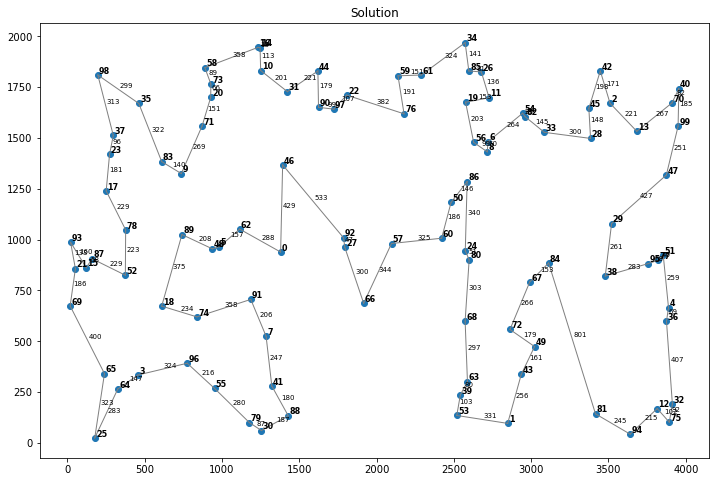

[ 0 46 92 27 66 57 60 50 86 24 80 68 63 39 53  1 43 49 72 67 84 81 94 12
 75 32 36  4 51 77 95 38 29 47 99 40 70 13  2 42 45 28 33 82 54  6  8 56
 19 11 26 85 34 61 59 76 22 97 90 44 31 10 14 16 58 73 20 71  9 83 35 98
 37 23 17 78 52 87 15 93 21 69 65 25 64  3 96 55 79 30 88 41  7 91 74 18
 89 48  5 62] 21285.44318157108


In [9]:
plot_path(kroA100_dist, kroA100_coords, kroA100_best_perm)
print(kroA100_best_perm, tsp_objective_function(kroA100_dist, kroA100_best_perm))

In [10]:
def SGA(n, Distance_matrix, population_size=500, crossover_probability=0.95, 
            mutation_probability=0.25, number_of_iterations=250, mutation=reverse_sequence_mutation,
           crossover=PMX):

    chromosome_length = n
    number_of_offspring = population_size
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    hist_of_best_objectives = np.zeros(number_of_iterations)

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(Distance_matrix, current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(Distance_matrix, children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
        
        hist_of_best_objectives[t] = objective_values[0]
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

#         print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return best_chromosome, hist_of_best_objectives

## OX - Order crossover	

In [11]:
def OX(P1, P2):
    x = np.random.choice(range(P1.shape[0]), size=2, replace=False)
    a, b = x.min(), x.max()
    x = np.random.choice(range(3), size=1, replace=False)
    if x == 0:
        b, a = a, 0
    elif x == 2:
        a, b = b, P1.shape[0]
    O1 = np.zeros(P1.shape[0])
    O2 = np.zeros(P1.shape[0])
    O1[a:b] = P1[a:b]
    O2[a:b] = P2[a:b]
    restricted_in_O1 = {P1[i] for i in range(a, b)}
    restricted_in_O2 = {P2[i] for i in range(a, b)}
    pointer_O1 = b
    pointer_O2 = b
    concatenated = itertools.chain(range(b, P1.shape[0]), range(0, b))
    list_to_insert_to_O1 = [P2[i] for i in concatenated if P2[i] not in restricted_in_O1 ]
    concatenated = itertools.chain(range(b, P1.shape[0]), range(0, b))
    list_to_insert_to_O2 = [P1[i] for i in concatenated if P1[i] not in restricted_in_O2 ]
    pointer = 0
    for i in range(b, P1.shape[0]):
        O1[i] = list_to_insert_to_O1[pointer]
        O2[i] = list_to_insert_to_O2[pointer]
        pointer += 1
    for i in range(0, a):
        O1[i] = list_to_insert_to_O1[pointer]
        O2[i] = list_to_insert_to_O2[pointer]
        pointer += 1
    return O1, O2

In [12]:
P1 = np.array([1,2,3,10,4,5,6,7,11,8,9])
P2 = np.array([4, 5, 2, 10, 1, 8, 7, 6, 11, 9, 3])
OX(P1, P2)

(array([ 2.,  1.,  8., 10.,  4.,  5.,  6.,  7., 11.,  9.,  3.]),
 array([ 3.,  4.,  5., 10.,  1.,  8.,  7.,  6., 11.,  9.,  2.]))

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.2 
 number_of_iterations = 500 
 tsp_objective_function: 23011.36531949693 
 best_permutation: [47 99 40 70 13  2 42 45 28 33 82 54 26 85 34 59 61 19 11 56  6  8 86 50
 24 80 60 57 76 22 97 90 44 31 46 10 14 16 58 73 20 71  9 83 35 98 37 23
 17 78 87 15 93 21 69 52 65 25 64  3 18 74 96 55 79 30 88 41  7 91  5 48
 89 62  0 92 27 66 68 39 53 63 72 67 84 49 43  1 81 94 12 75 32 36  4 51
 77 95 38 29]


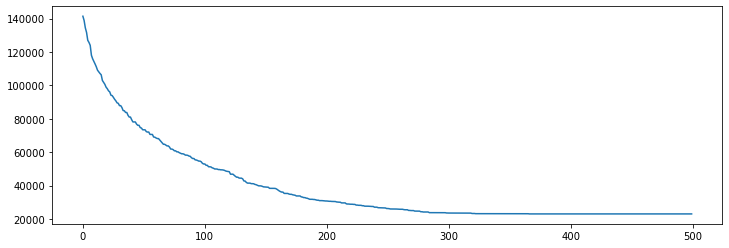

<Figure size 864x576 with 0 Axes>

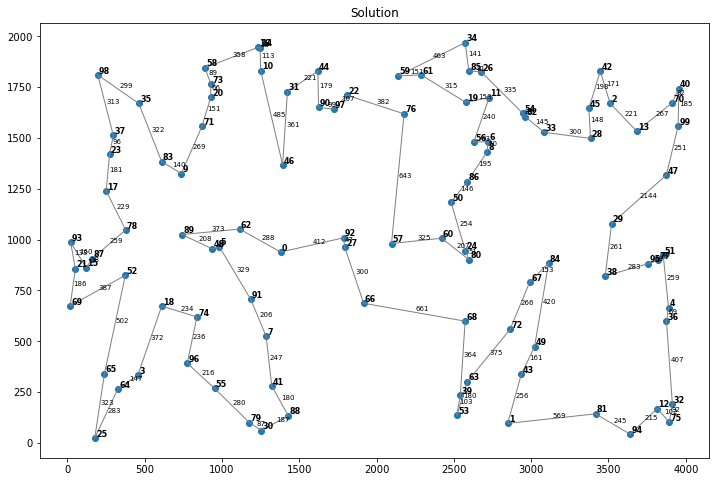

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 500 
 tsp_objective_function: 23613.448837488984 
 best_permutation: [ 1 53 88 30 79 41  7 91 55 96 74 18  3 64 25 65 69 21 93 15 87 52 78 17
 23 37 98 35 71 83  9 89 48  5 62  0 46 20 73 58 16 14 10 31 44 90 97 22
 92 27 66 57 60 24 50 86  8  6 56 19 76 59 61 34 85 26 11 54 82 33 28 45
 42  2 13 70 40 99 47 51 77 95  4 36 32 75 12 94 81 38 29 84 67 49 43 72
 80 68 63 39]


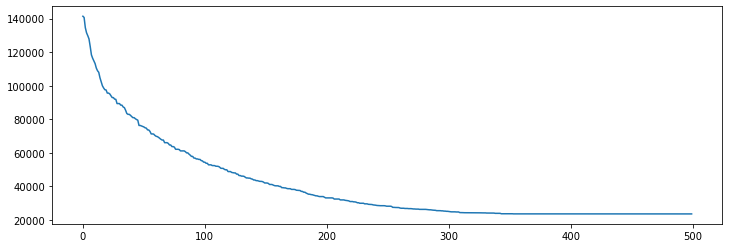

<Figure size 864x576 with 0 Axes>

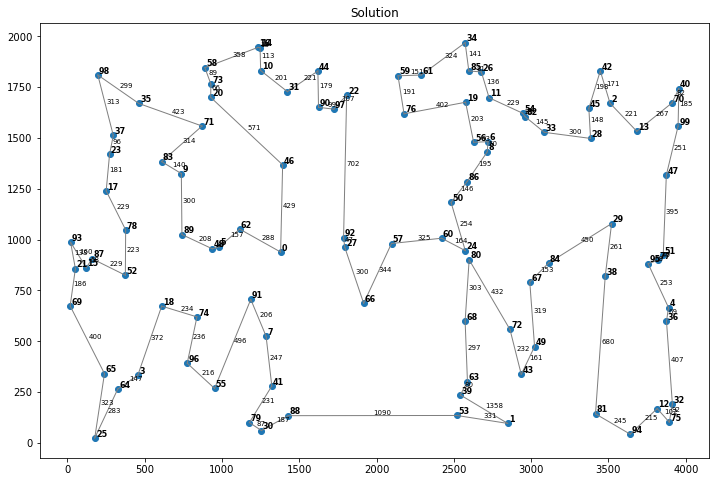

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 500 
 tsp_objective_function: 23380.674147933318 
 best_permutation: [92 50 86  8  6 56 11 19 76 59 61 34 85 26 54 82 33 28 45 42  2 13 70 40
 99 47 29 38 95 77 51  4 36 32 75 12 94 81 49 43  1 53 39 63 68 72 67 84
 80 24 60 57 66 41 88 30 79  7 91 74 96 55 25 65 64  3 18 52 87 15 69 21
 93 17 78 89 48  5 62  9 83 23 37 98 35 71 20 73 58 16 14 10 31 44 22 97
 90 46  0 27]


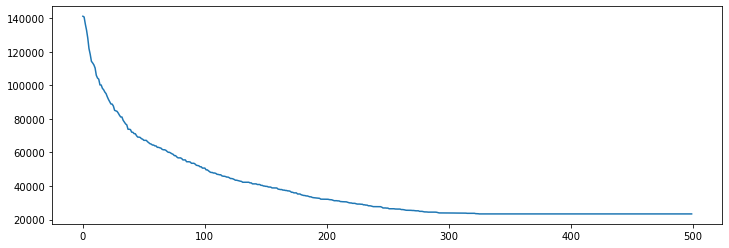

<Figure size 864x576 with 0 Axes>

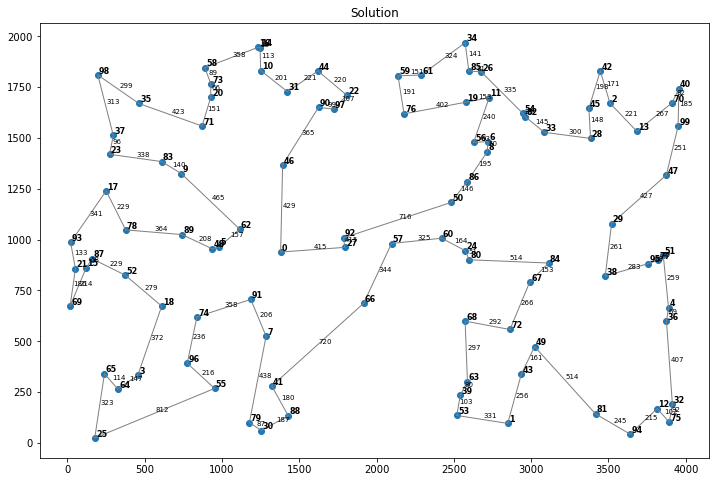

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.2 
 number_of_iterations = 500 
 tsp_objective_function: 23867.321885677928 
 best_permutation: [39 63  1 81 94 12 75 32 36  4 95 77 51 47 99 40 70 13  2 42 45 33 28 29
 38 84 67 72 49 43 68 80 24 60 50 86  8  6 82 54 11 26 34 85 19 56 76 61
 59 22 97 44 90 92 27 57 66  0 46 31 10 14 16 58 73 20 71 35 98 37 23 17
 78 52 87 15 93 21 69 65 25 64  3 96 55 74 18 89 83  9 48  5 62 91  7 41
 79 30 88 53]


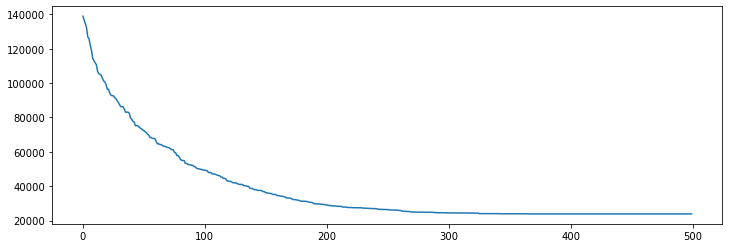

<Figure size 864x576 with 0 Axes>

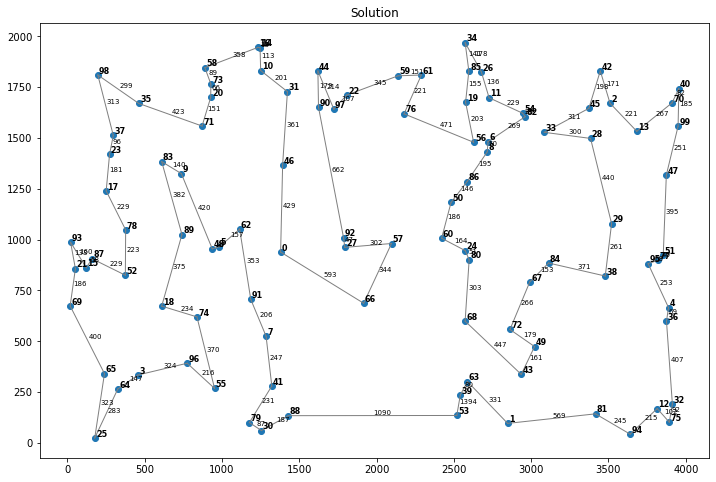

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 500 
 tsp_objective_function: 23805.444915097716 
 best_permutation: [54 11 26 34 85 19 61 59 76 22 97 90 46 62  5 48  9 71 20 73 10 31 44 14
 16 58 98 35 83 89 18 52 78 37 23 17 93 87 15 21 69 65 25 64  3 74 96 55
 79 30 88 41  7 91  0 92 27 66 57 60 68 63 39 53  1 43 81 94 12 75 32 36
  4 95 77 51 47 99 40 70 13  2 42 45 33 28 29 38 84 67 49 72 80 24 50 86
 56  8  6 82]


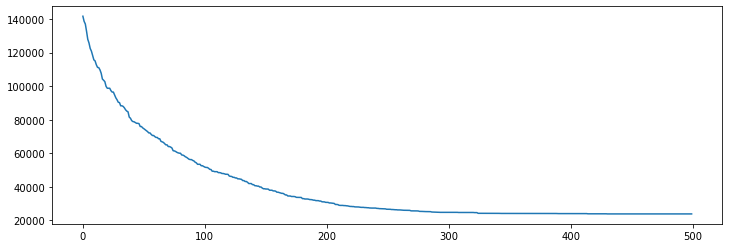

<Figure size 864x576 with 0 Axes>

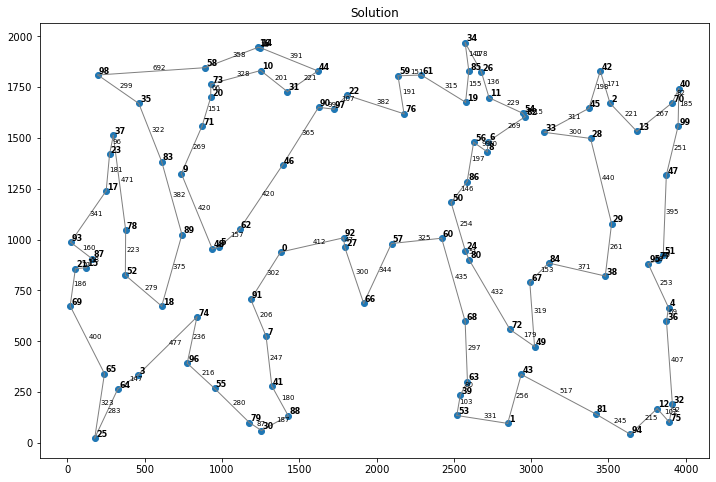

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 500 
 tsp_objective_function: 23979.555200000046 
 best_permutation: [96 74 18  3 64 25 65 69 21 93 15 87 52 78 17 23 37 98 35 83 71 20 73 58
 16 14 10 31 90 44 59 61 34 85 26 19 11 54 82 45 42  2 13 70 40 99 47 28
 33  6  8 56 86 76 22 97 46  9 89 48  5 62 91  0 92 27 57 60 50 24 80 68
 43 49 72 67 84 38 29 95 77 51  4 36 32 75 12 94 81  1 53 39 63 66  7 41
 88 30 79 55]


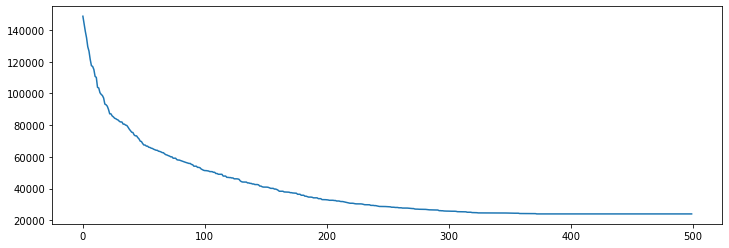

<Figure size 864x576 with 0 Axes>

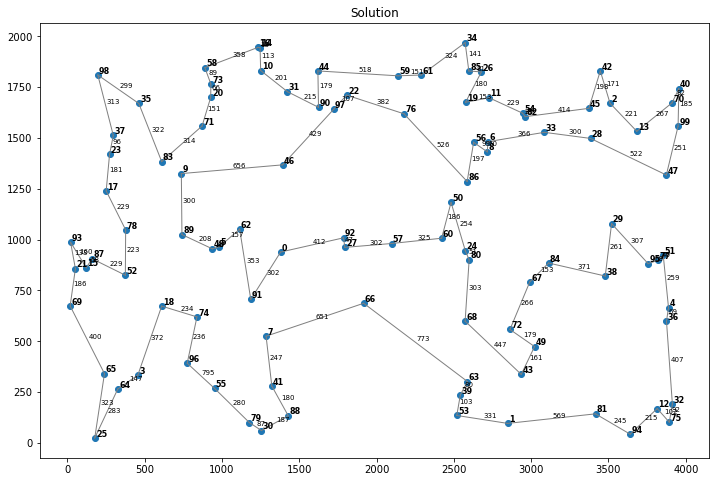

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.2 
 number_of_iterations = 500 
 tsp_objective_function: 22115.122026799014 
 best_permutation: [44 31 10 14 16 58 73 20 71 46 62  5 48 89  9 83 35 98 37 23 17 78 52 87
 15 93 21 69 65 25 64  3 18 74 96 55 79 30 88 41  7 91  0 92 27 66 57 60
 68 63 39 53  1 43 49 81 94 12 75 32 36  4 38 95 77 51 47 99 40 70 13  2
 42 45 54 82 33 28 29 84 67 72 80 24 50 86  8  6 56 19 11 26 85 34 61 59
 76 22 97 90]


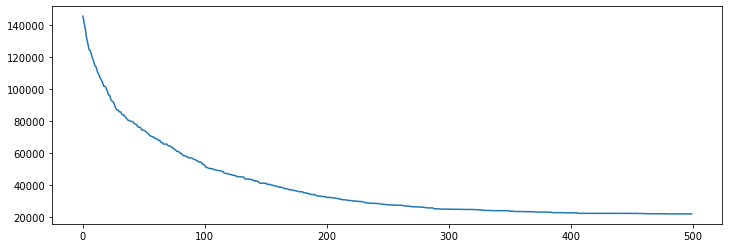

<Figure size 864x576 with 0 Axes>

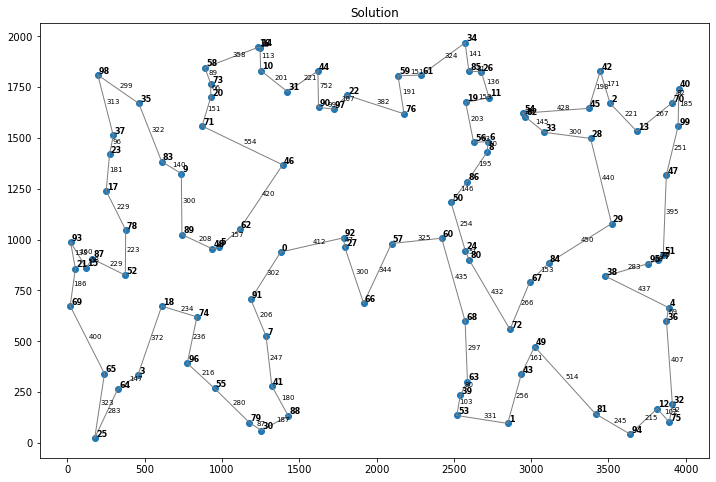

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 500 
 tsp_objective_function: 23148.861809227536 
 best_permutation: [54 11 19 26 85 34 61 59 76 22 97 44 90 46 31 10 14 16 58 73 20 71 35 98
 37 23 17 83  9 78 93 21 69 15 87 52 18 89 48  5 62 74  3 64 65 25 96 55
 79 30 88 41  7 91  0 92 27 57 66 39 53  1 63 68 80 24 60 50 86 56  6  8
 84 67 72 49 43 81 94 12 75 32 36  4 51 77 95 38 29 47 99 40 70 13  2 42
 45 28 33 82]


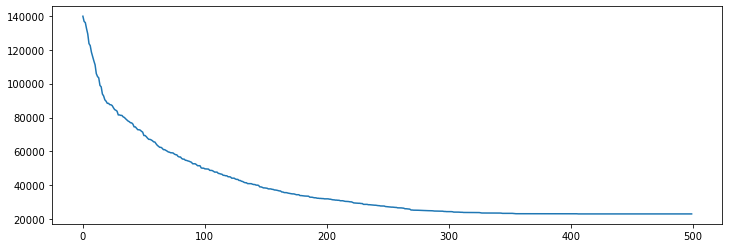

<Figure size 864x576 with 0 Axes>

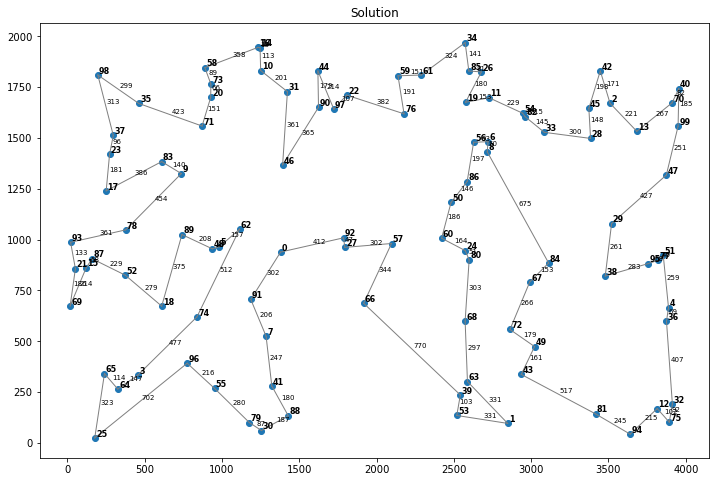

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 500 
 tsp_objective_function: 21888.283745923305 
 best_permutation: [94 12 75 32 36  4 51 77 95 29 47 99 40 70 13  2 42 45 28 33 82 54  6  8
 86 50 56 19 11 26 85 34 61 59 76 22 97 90 44 31 10 14 16 58 73 20 71  9
 83 35 98 37 23 17 93 21 69 15 87 52 78 89 48 74 18 65 25 64  3 96 55 79
 30 88 41  7 91  5 62  0 46 92 27 66 57 60 24 80 68 63 39 53  1 43 49 72
 67 84 38 81]


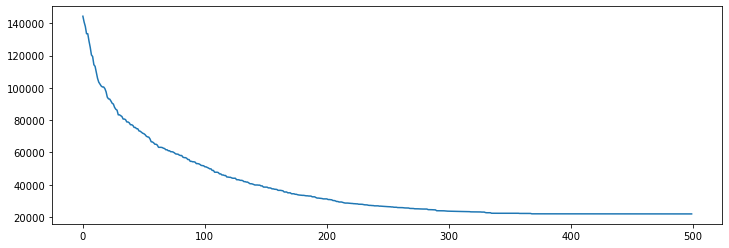

<Figure size 864x576 with 0 Axes>

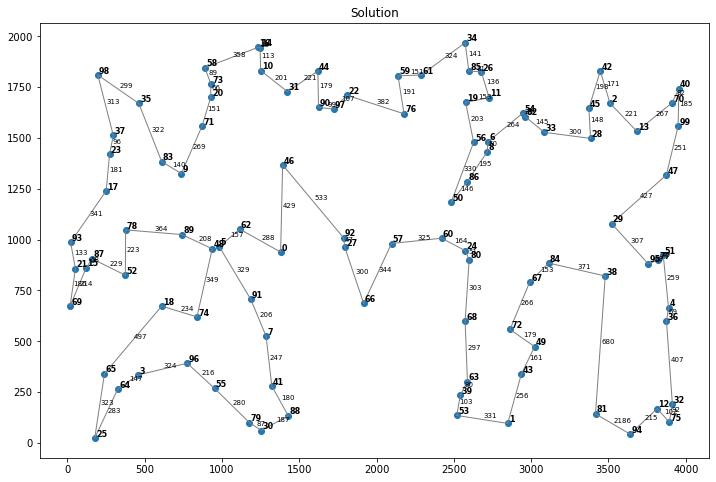

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.2 
 number_of_iterations = 500 
 tsp_objective_function: 23526.303716376493 
 best_permutation: [47 99 40 70 13  2 42 45 28 33 82 54 11 26 34 85  6  8 86 50 56 19 61 59
 76 27 92 46 90 97 22 44 31 10 14 16 58 73 20 71 35 98 37 23 83  9 89 52
 78 17 93 87 15 21 69 65 25 64  3 96 74 18 48  5 62  0 91 55 79 30 88 41
  7 66 57 60 24 80 84 67 72 49 43 68 63 39 53  1 81 94 12 75 32 36  4 38
 29 95 77 51]


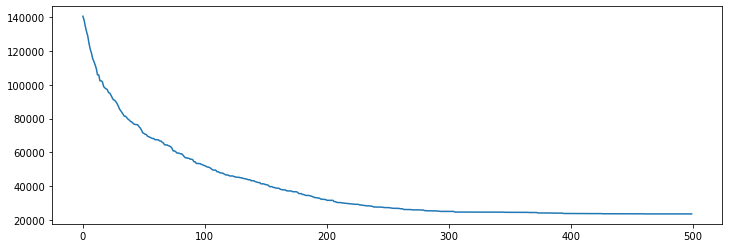

<Figure size 864x576 with 0 Axes>

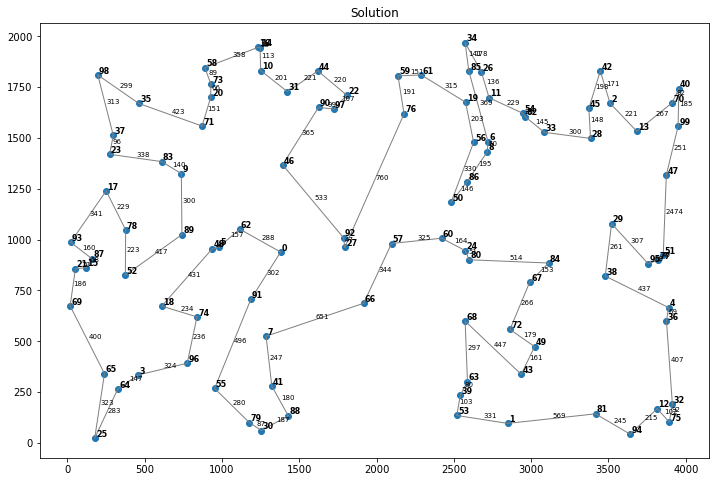

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.25 
 number_of_iterations = 500 
 tsp_objective_function: 23175.361286625575 
 best_permutation: [13  2 42 45 82 54 11 26 34 85 19 61 59 76 22 97 44 90 46 31 10 14 16 58
 73 20 71  5 48 89  9 83 35 98 37 23 17 78 18 52 87 15 93 21 69 65 25 64
  3 74 96 55 79 30 88 41  7 91 62  0 92 27 57 66 53 39 63 68 80 24 60 50
 86 56  8  6 33 28 29 84 67 72 49 43  1 81 94 12 75 32 36  4 38 95 77 51
 47 99 40 70]


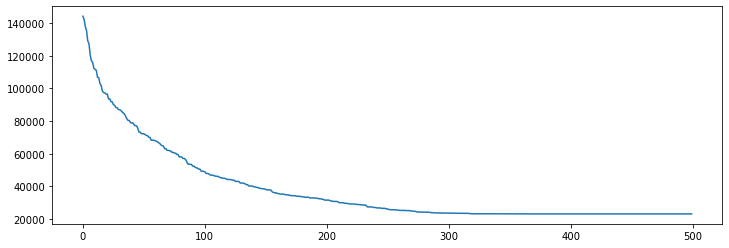

<Figure size 864x576 with 0 Axes>

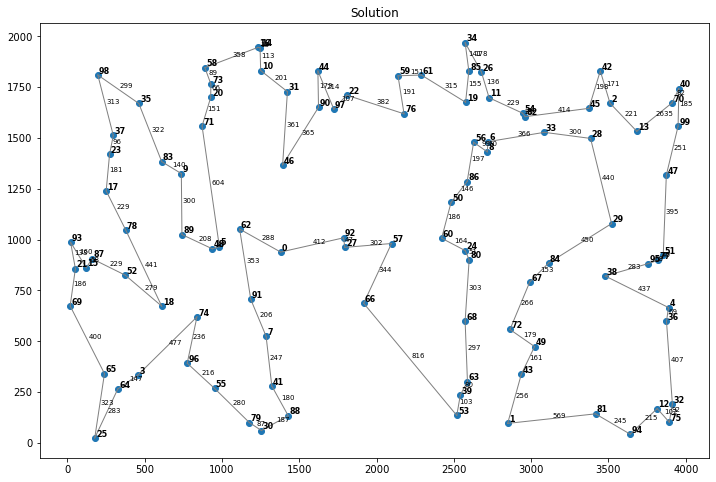

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.3 
 number_of_iterations = 500 
 tsp_objective_function: 23847.27265746557 
 best_permutation: [48  5 71 20 73 58 16 14 10 31 44 22 59 61 34 85 26 11 54 82 33 67 84 38
 29 28 45 42  2 13 70 40 99 47 51 77 95  4 36 32 75 12 94 81 49 43  1 53
 39 63 72 68 80 24 60 50 86 56  8  6 19 76 97 90 46 62  0 92 27 57 66  7
 91 74 41 88 30 79 55 96  3 64 25 65 69 21 93 15 87 78 17 23 37 98 35 83
  9 52 18 89]


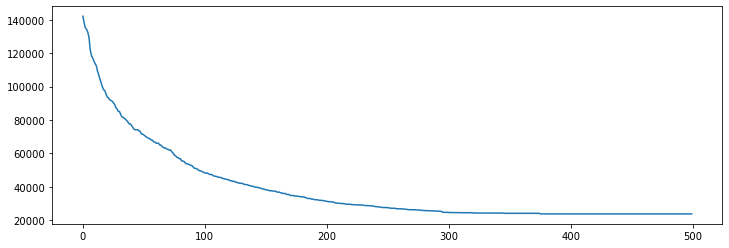

<Figure size 864x576 with 0 Axes>

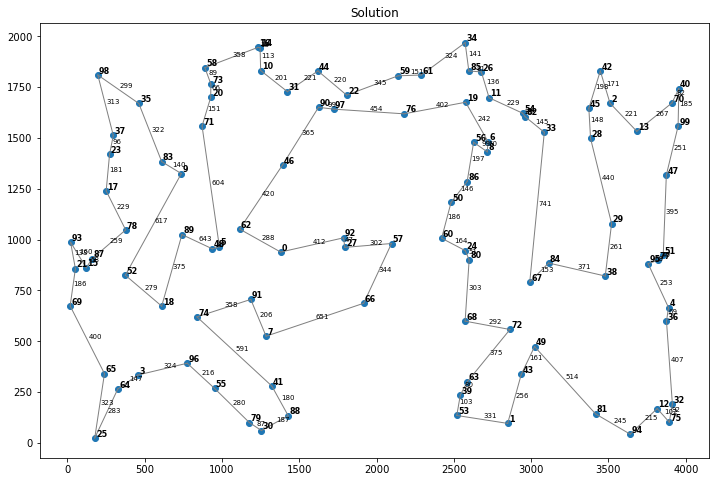

In [45]:
dist_matr = [kroA100_dist]
coords = kroA100_coords
num = [100]
pop_size = [1000]
cross_prob = [0.975, 0.95, 0.9, 0.85]
mut_prob = [0.2, 0.25, 0.3]
num_of_iter = [500]
crossover = [OX]
mutation = [reverse_sequence_mutation]

for (n, d_matrix, pop, cross, mut, n_it, cro, mu) in itertools.product(num, dist_matr, 
                                            pop_size, cross_prob, mut_prob, num_of_iter, crossover, mutation):
    best_p, costs = SGA(n, d_matrix, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", tsp_objective_function(d_matrix, best_p), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    plot_path(d_matrix, coords, best_p)

 population_size = 1000 
 crossover_probability = 0.925 
 mutation_probability = 0.15 
 number_of_iterations = 500 
 tsp_objective_function: 22512.72905951099 
 best_permutation: [93 21 69 65 25 64  3 18 74 96 55 79 30 88 41  7 91  0 92 27 66 57 60 50
 56 86 24 80 68 63 39 53  1 43 72 49 81 94 12 75 32 36  4 51 77 95 29 38
 67 84 28 13 47 99 70 40  2 42 45 33 82 54  8  6 19 11 26 85 34 61 59 76
 22 97 44 14 16 10 31 90 46 62  5 48 89  9 83 71 20 73 58 35 98 37 23 17
 78 52 87 15]


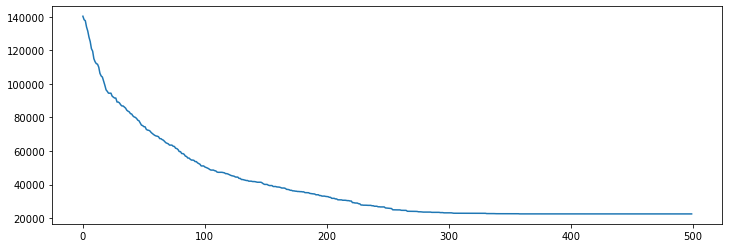

<Figure size 864x576 with 0 Axes>

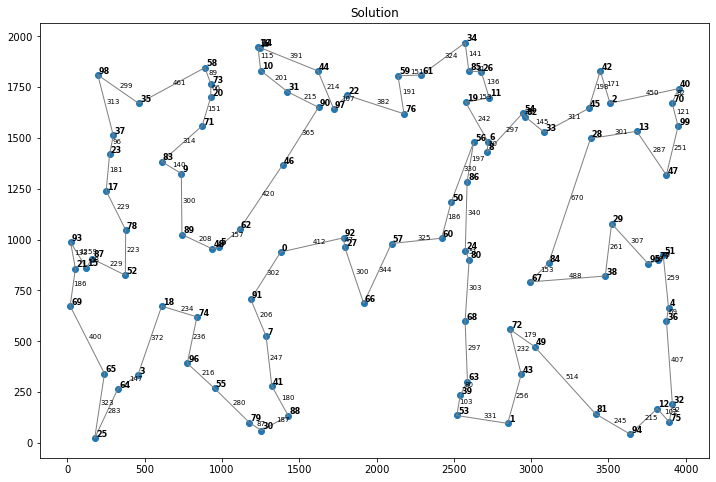

 population_size = 1000 
 crossover_probability = 0.925 
 mutation_probability = 0.2 
 number_of_iterations = 500 
 tsp_objective_function: 23277.451736813633 
 best_permutation: [25 64  3 96 74 48  5 62 46 92  0 91  7 55 79 30 88 41 66 27 57 60 24 80
 68 63 39 53  1 43 49 72 67 84 29 38 81 94 12 75 32 36  4 95 77 51 47 99
 40 70 13  2 42 45 28 33 82 54 26 85 34 61 19 11  6  8 56 86 50 76 59 22
 97 90 44 31 10 14 16 58 73 20 71 83  9 89 18 52 78 35 98 37 23 17 93 87
 15 21 69 65]


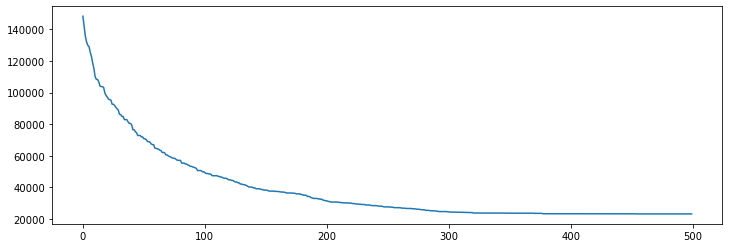

<Figure size 864x576 with 0 Axes>

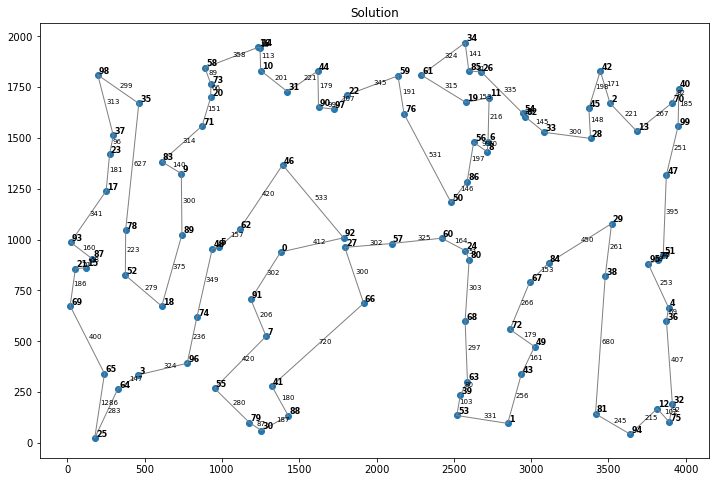

 population_size = 1000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 500 
 tsp_objective_function: 21619.60895451656 
 best_permutation: [74 96 55 79 30 88 41  7 91  0 92 27 66 57 60 50 86 24 80 67 84 49 72 68
 63 39 53  1 43 81 94 12 75 32 36  4 51 77 95 38 29 47 99 40 70 13  2 42
 45 28 33 82 54  6  8 56 19 11 26 85 34 61 59 76 22 97 44 90 46 31 10 14
 16 58 73 20 71 62  5 48 89  9 83 35 98 37 23 17 78 52 87 15 93 21 69 65
 25 64  3 18]


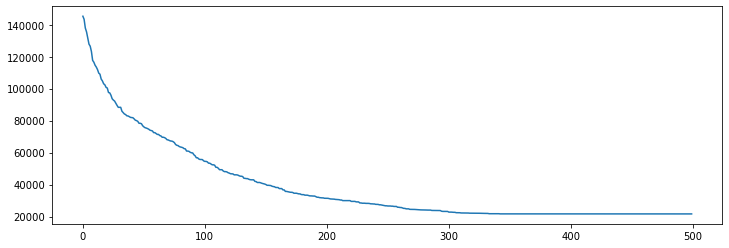

<Figure size 864x576 with 0 Axes>

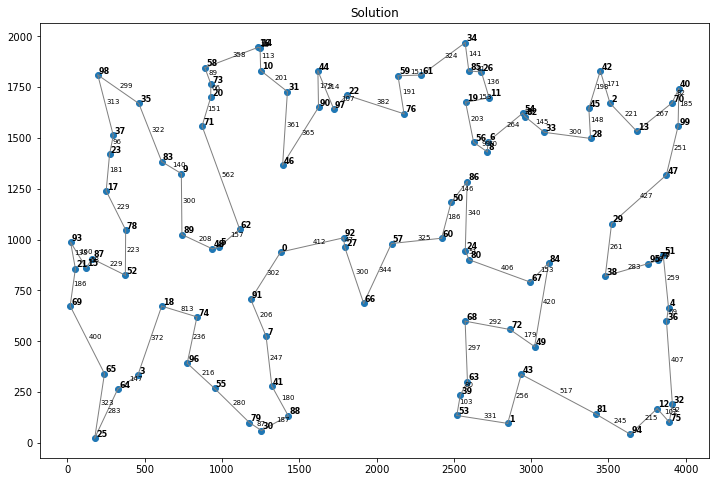

 population_size = 1000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 500 
 tsp_objective_function: 22659.262662944257 
 best_permutation: [13  2 42 45 28 29 84 67 72 68 80 24 60 50 86 56  8  6 33 82 54 11 19 26
 85 34 61 59 76 22 97 90 44 31 10 14 16 58 73 20 71  9 83 35 98 37 23 17
 78 87 15 93 21 69 52  3 64 65 25 55 79 30 88 41  7 91 74 96 18 89 48  5
 62  0 46 92 27 57 66 63 39 53  1 43 49 81 94 12 75 32 36  4 38 95 77 51
 47 99 40 70]


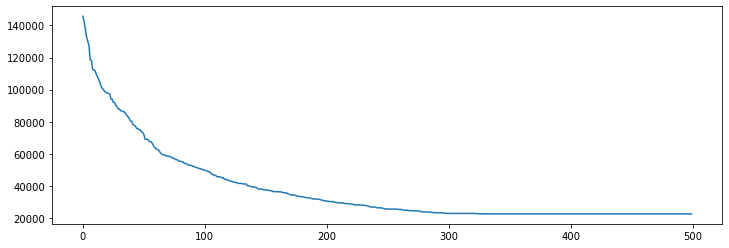

<Figure size 864x576 with 0 Axes>

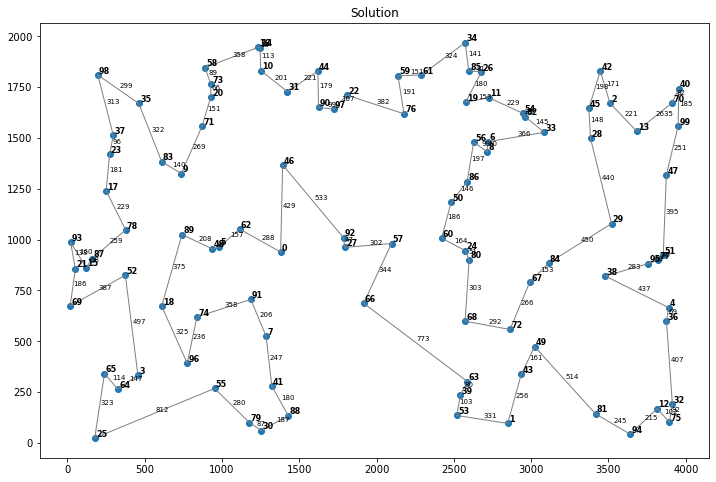

 population_size = 1000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 500 
 tsp_objective_function: 23269.73697664812 
 best_permutation: [78 18 52 87 15 93 21 69 65 25 64  3 96 74 91  7 41 55 79 30 88 66 68 63
 39 53  1 81 94 12 75 32 36  4 95 77 51 47 99 40 70 13  2 42 45 54 82 33
 28 29 38 84 67 49 43 72 80 24 60 50 86 56  8  6 19 11 26 85 34 61 59 76
 22 97 90 44 31 10 14 16 58 73 20 71 46 57 27 92  0 62  5 48 89  9 83 35
 98 37 23 17]


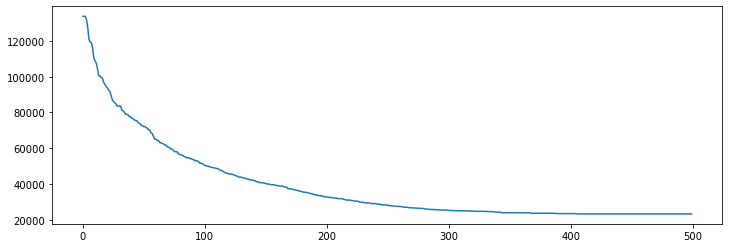

<Figure size 864x576 with 0 Axes>

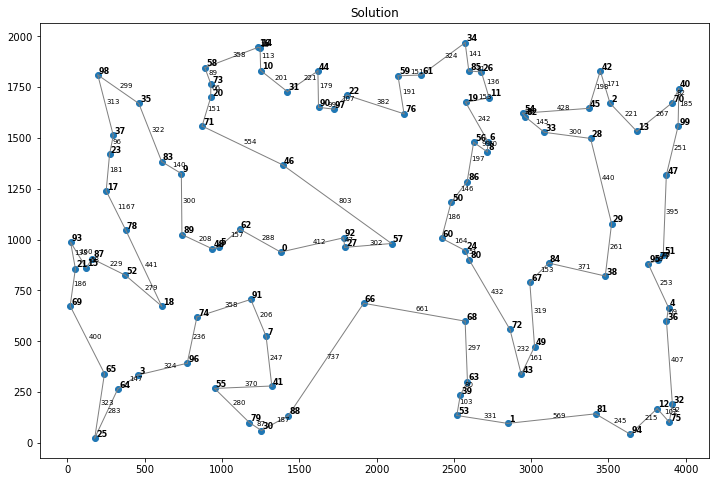

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.15 
 number_of_iterations = 500 
 tsp_objective_function: 23176.320095395808 
 best_permutation: [33 82 54  6  8 86 56 19 11 26 85 34 61 59 76 22 97 90 44 14 16 10 31 46
 71 20 73 58 35 98 37 23 83  9 78 17 93 21 69 15 87 52 18 74  3 65 25 64
 96 55 79 30 88 41  7 91  5 48 89 62  0 92 27 66 57 60 50 24 80 68 67 84
 72 63 39 53  1 43 49 81 94 12 75 32 36  4 51 77 95 38 29 28 47 99 40 70
 13  2 42 45]


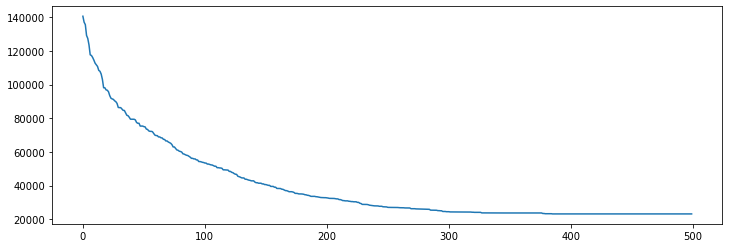

<Figure size 864x576 with 0 Axes>

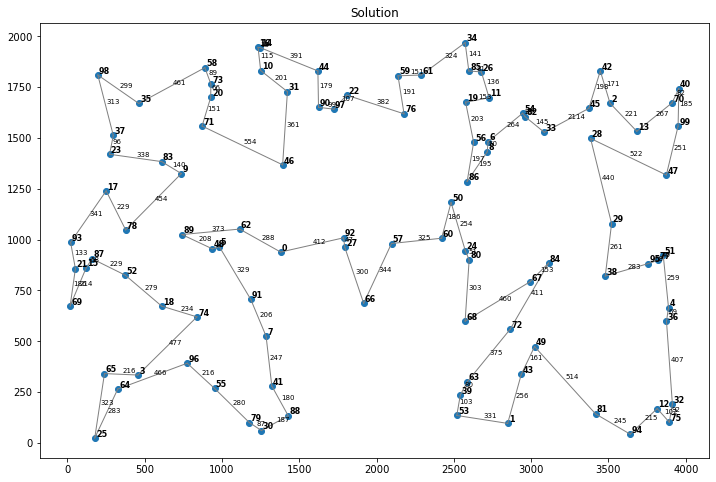

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.2 
 number_of_iterations = 500 
 tsp_objective_function: 23817.254305036542 
 best_permutation: [17 93 15 21 69 65 25 64  3 96 74 18 52 87 78 83  9 89 48  5 62  0 91  7
 41 55 79 30 88 53 39 63  1 43 81 94 12 75 32 36  4 51 77 95 38 84 67 49
 72 68 80 24 28 29 47 99 40 70 13  2 42 45 33 82 54 26 85 34 61 59 76 19
 11 56  6  8 86 50 60 57 66 27 92 46 90 97 22 44 31 10 14 16 58 73 20 71
 35 98 37 23]


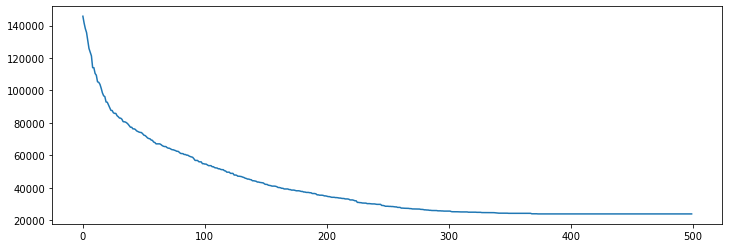

<Figure size 864x576 with 0 Axes>

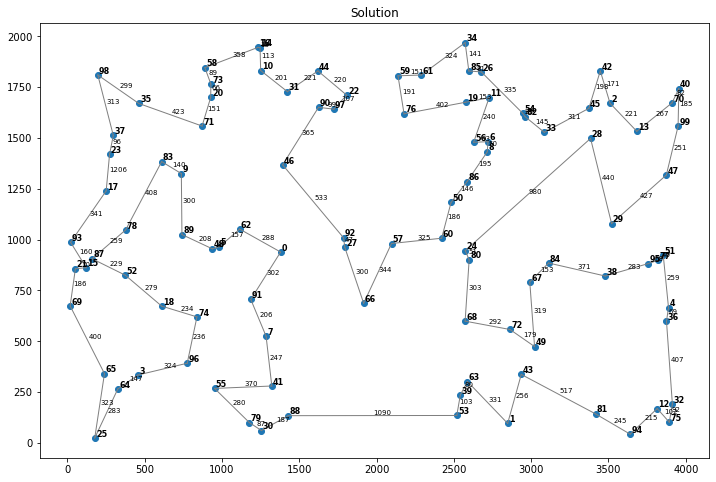

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 500 
 tsp_objective_function: 23738.099892876908 
 best_permutation: [14 16 58 73 20 71  9 83 35 98 37 23 17 93 87 15 21 69 65 25 64  3 52 78
 89 48  5 62 91 74 18 96 55  7 41 79 30 88 53 39 63 68 80 84 67 72 49 43
  1 81 94 12 75 32 36  4 38 29 95 77 51 47 99 40 70 13  2 42 45 28 33 82
 54 26 85 34 59 61 19 11  6  8 56 86 50 24 60 57 66 27 92  0 46 90 97 76
 22 44 31 10]


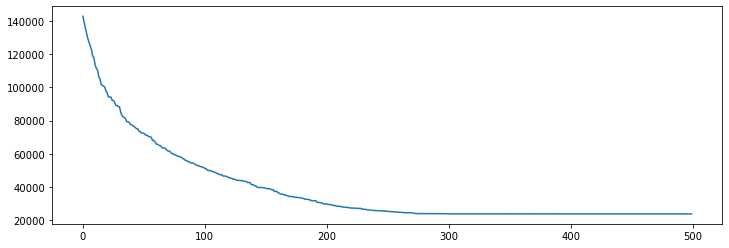

<Figure size 864x576 with 0 Axes>

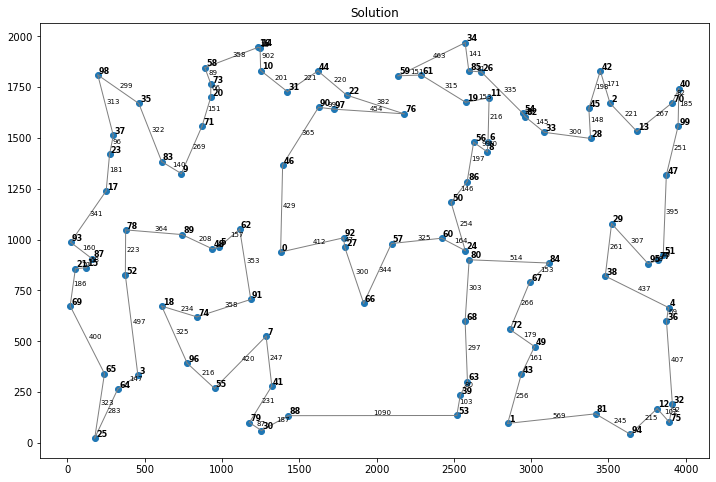

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 500 
 tsp_objective_function: 22613.256942091368 
 best_permutation: [91  0 62  5 48 89 18 74 96  3 64 25 65 69 21 93 15 87 52 78 17 23 37 98
 35 83  9 71 20 73 58 16 14 10 46 31 44 90 97 22 76 59 61 34 85 26 19 11
 54 82 42 40 70 99 47 13  2 45 28 33  6  8 56 86 50 60 24 80 67 84 38 29
 95 77 51  4 36 32 75 12 94 81 49 43  1 53 39 63 72 68 57 92 27 66 41 88
 30 79 55  7]


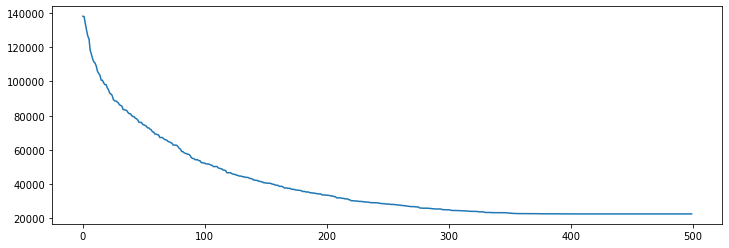

<Figure size 864x576 with 0 Axes>

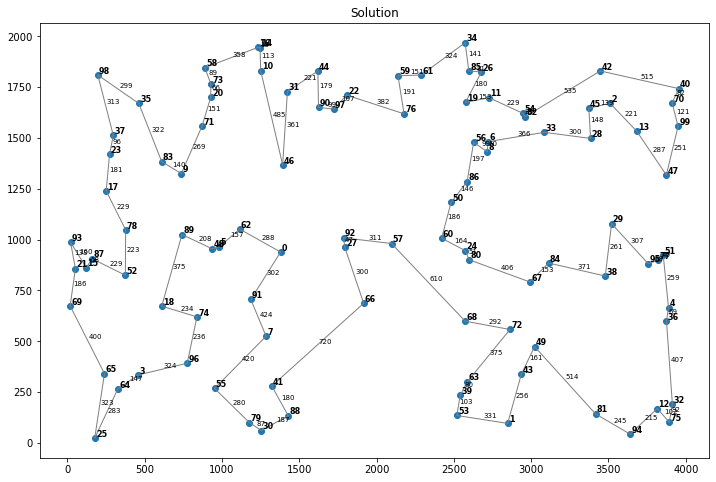

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 500 
 tsp_objective_function: 23719.998588787934 
 best_permutation: [ 4 36 32 75 12 94 81  1 39 53 88 41 30 79 55 96  3 64 25 65 74 18 52 78
 87 15 69 21 93 17 23 37 98 35 58 73 20 71 83  9 89 48  5 91  7  0 62 46
 90 31 10 16 14 44 97 22 76 59 61 34 85 26 19 11 54 82 33  6  8 56 86 50
 60 57 92 27 66 24 80 68 63 43 49 72 67 84 38 29 28 45 42  2 13 70 40 99
 47 51 77 95]


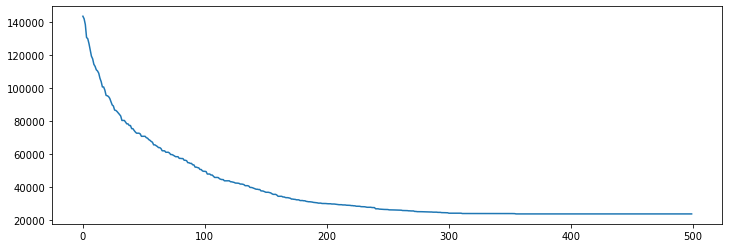

<Figure size 864x576 with 0 Axes>

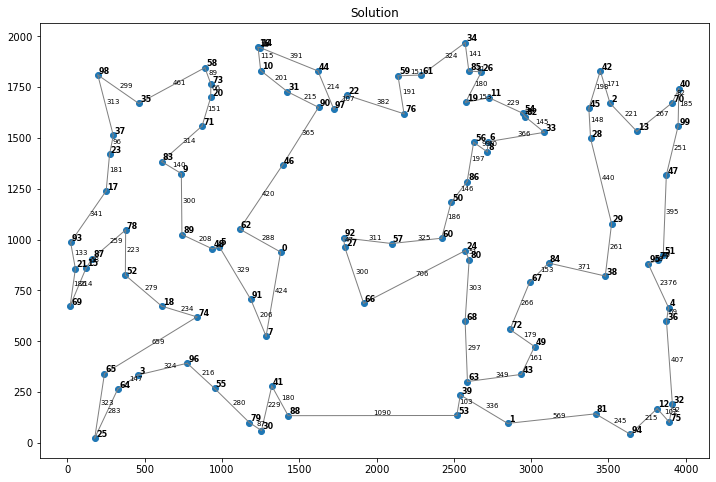

 population_size = 1000 
 crossover_probability = 0.875 
 mutation_probability = 0.15 
 number_of_iterations = 500 
 tsp_objective_function: 23924.23778903145 
 best_permutation: [23 37 98 35 83 71 20 73 58 16 14 10 31 46 90 44 97 22 76 59 61 34 85 26
 19 11 54 82 45 42  2 13 70 40 99 47 28 33  6  8 56 86 50 57 60 24 80 67
 84 38 29 95 77 51  4 36 32 75 12 94 81  1 43 49 72 68 63 39 53 88 30 79
 55 96  3 64 25 65 69 21 93 15 87 78 52 18 74  7 41 66 27 92  0 91 62  5
 48 89  9 17]


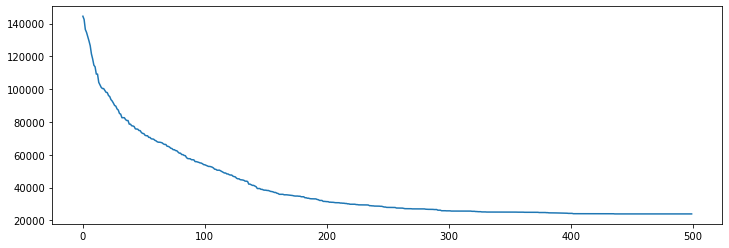

<Figure size 864x576 with 0 Axes>

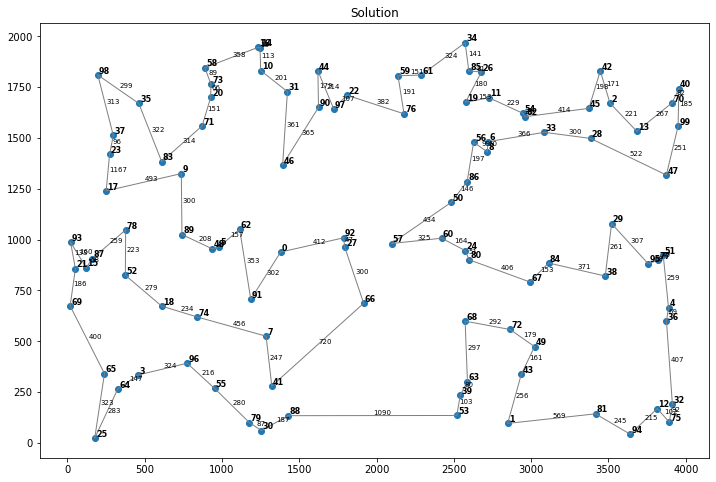

 population_size = 1000 
 crossover_probability = 0.875 
 mutation_probability = 0.2 
 number_of_iterations = 500 
 tsp_objective_function: 23430.012661862398 
 best_permutation: [21 93 15 87 52 18 74  5 48 89 78 17 23 37 98 35 58 16 14 44 22 97 90 46
 31 10 73 20 71 83  9 62  0 92 27 57 76 59 61 34 85 26 19 11 54 82 33 28
 45 42  2 13 70 40 99 47 29 38 95 77 51  4 36 32 75 12 94 81  1 43 49 72
 67 84  8  6 56 86 50 60 24 80 68 63 39 53 66 91  7 41 88 30 79 55 96  3
 64 25 65 69]


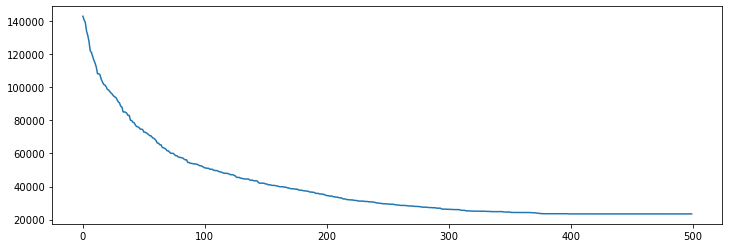

<Figure size 864x576 with 0 Axes>

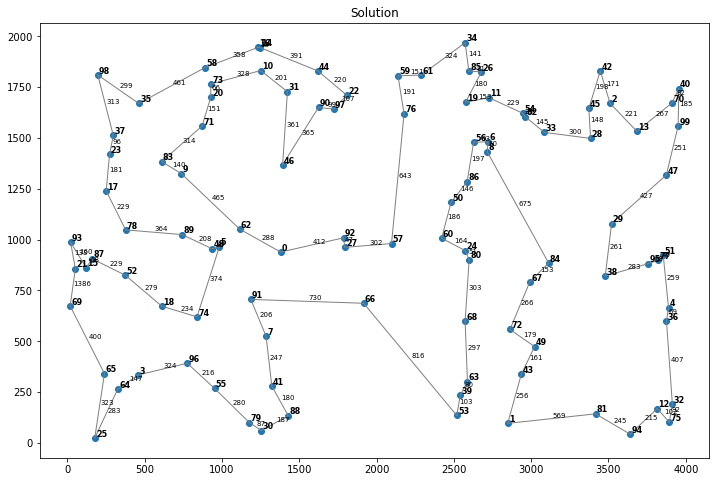

 population_size = 1000 
 crossover_probability = 0.875 
 mutation_probability = 0.25 
 number_of_iterations = 500 
 tsp_objective_function: 23370.028116117763 
 best_permutation: [23 17 93 78 52 87 15 21 69 65 25 64  3 96 55 79 30 88 41  7 66 27 92 57
 68 63 39 53  1 43 72 49 38 81 94 12 75 32 36  4 51 77 95 29 47 99 40 70
 13  2 42 45 28 33 82 54 84 67 80 24 60 50 86 56  8  6 11 26 34 85 19 61
 59 76 22 97 90 44 31 14 16 10 46 62 48  5  0 91 74 18 89  9 83 71 20 73
 58 35 98 37]


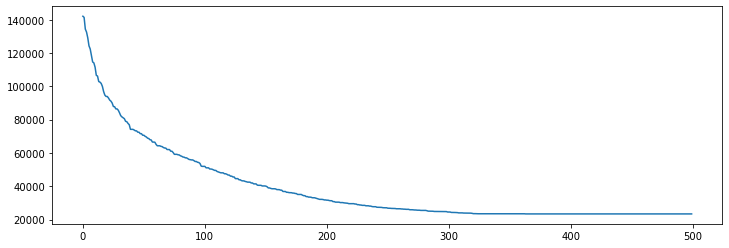

<Figure size 864x576 with 0 Axes>

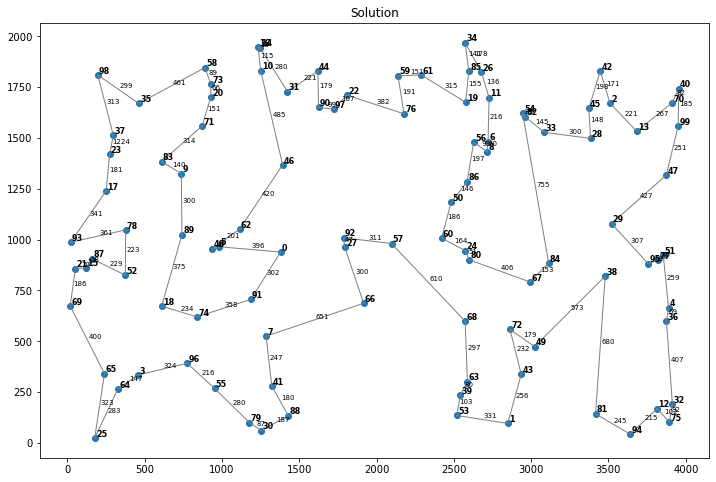

 population_size = 1000 
 crossover_probability = 0.875 
 mutation_probability = 0.3 
 number_of_iterations = 500 
 tsp_objective_function: 22423.11842837136 
 best_permutation: [42  2 13 70 40 99 47 29  8  6 56 86 50 60 24 80 68 72 67 84 38 95 77 51
  4 36 32 75 12 94 81 49 43  1 53 39 63 66 57 27 92  0 91  7 41 88 30 79
 55 96 74 18  3 64 25 65 69 21 93 15 87 52 78 17 23 37 98 35 71 83  9 89
 48  5 62 46 20 73 58 16 14 10 31 44 90 97 22 76 59 61 19 85 34 26 11 54
 82 33 28 45]


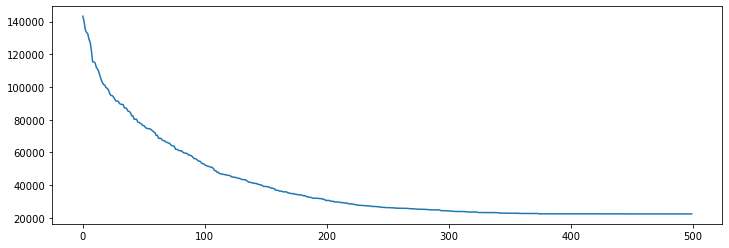

<Figure size 864x576 with 0 Axes>

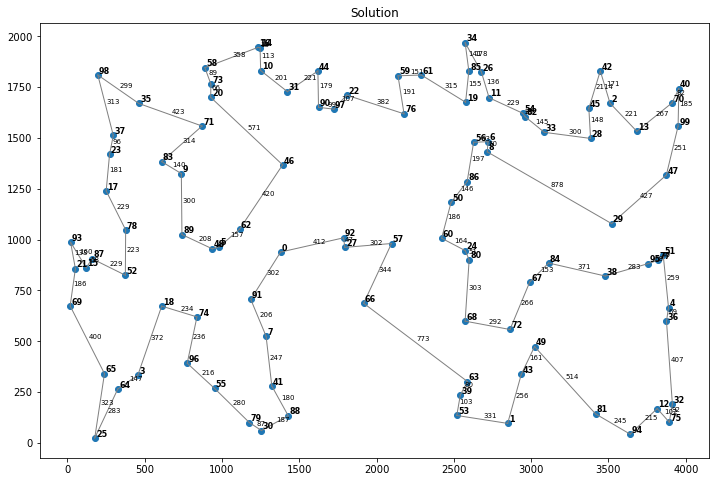

 population_size = 1000 
 crossover_probability = 0.875 
 mutation_probability = 0.35 
 number_of_iterations = 500 
 tsp_objective_function: 22774.894256278927 
 best_permutation: [ 1 43 49 67 84 38 81 94 12 75 32 36  4 51 77 95 29 47 99 40 70 13  2 42
 45 28 33 82 54 11 26 85 34 61 59 22 97 90 44 31 46 10 14 16 58 73 20 71
 35 98 37 23 17 83  9 78 52 87 15 93 21 69 65 25 64  3 96 55 74 18 89 48
  5 62  0 91  7 41 79 30 88 66 27 92 57 76 19 56  6  8 86 50 60 24 80 68
 72 63 39 53]


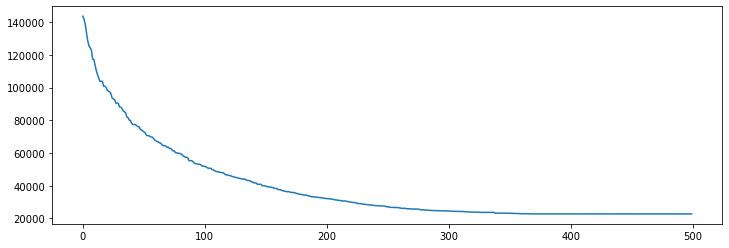

<Figure size 864x576 with 0 Axes>

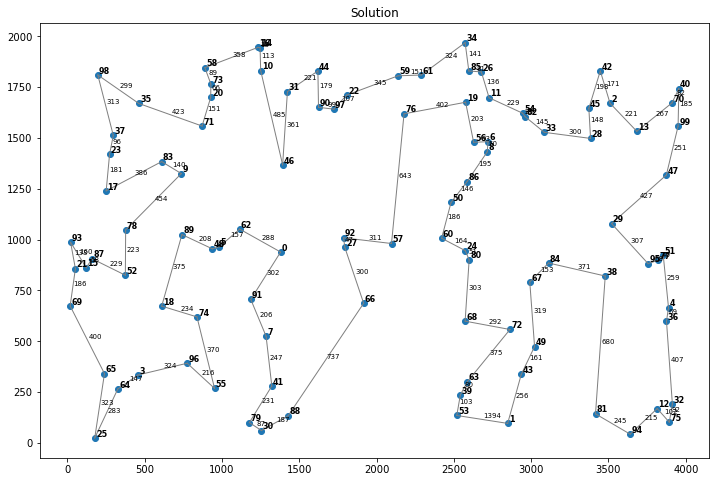

In [46]:
dist_matr = [kroA100_dist]
coords = kroA100_coords
num = [100]
pop_size = [1000]
cross_prob = [0.925, 0.90, 0.875]
mut_prob = [0.15, 0.2, 0.25, 0.3, 0.35]
num_of_iter = [500]
crossover = [OX]
mutation = [reverse_sequence_mutation]

for (n, d_matrix, pop, cross, mut, n_it, cro, mu) in itertools.product(num, dist_matr, 
                                            pop_size, cross_prob, mut_prob, num_of_iter, crossover, mutation):
    best_p, costs = SGA(n, d_matrix, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", tsp_objective_function(d_matrix, best_p), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    plot_path(d_matrix, coords, best_p)

## CX - Cycle crossover

In [13]:
def CX(P1, P2):
    O1 = np.zeros(P1.shape[0])
    O2 = np.zeros(P1.shape[0])
    cycles = np.zeros(P1.shape[0])
#     P1_values_to_indices = {P1[i]:i for i in range(P1.shape[0])}
    P2_values_to_indices = {P2[i]:i for i in range(P1.shape[0])}
#     print(P2_values_to_indices)
    cycle_number = 1
    for i in range(P1.shape[0]):
        if cycles[i] == 0:
            start = P1[i]
            current_index = P2_values_to_indices[start]
            new = P1[current_index]
            cycles[i] = cycle_number
            while new != start:
                cycles[current_index] = cycle_number
                new = P1[current_index]
                current_index = P2_values_to_indices[new]
            cycle_number += 1
#     print(cycles)
    for i in range(P1.shape[0]):
        if cycles[i] % 2 == 1:
            O1[i], O2[i] = P1[i], P2[i]
        else:
            O1[i], O2[i] = P2[i], P1[i]
    return O1, O2

In [14]:
P1 = np.array([8, 4, 7, 3, 6, 2, 5, 1, 9, 0])
P2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
CX(P1, P2)

(array([8., 1., 2., 3., 4., 5., 6., 7., 9., 0.]),
 array([0., 4., 7., 3., 6., 2., 5., 1., 8., 9.]))

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 23242.21295150256 
 best_permutation: [32 36  4 77 51 47 99 40 70 13  2 42 45 28 33 82 54 11 26 85 34 61 59 44
 31 10 14 16 58 73 20 71 83 35 98 37 23 17 78 87 15 93 21 69 65 25 64  3
 96 55 79 30 88 41  7 91 74 18 52  9 89 48  5 62 46 90 97 22 76 19  6  8
 56 86 50 60 57 27 92  0 66 24 80 68 63 39 53  1 43 49 72 67 84 29 95 38
 81 94 12 75]


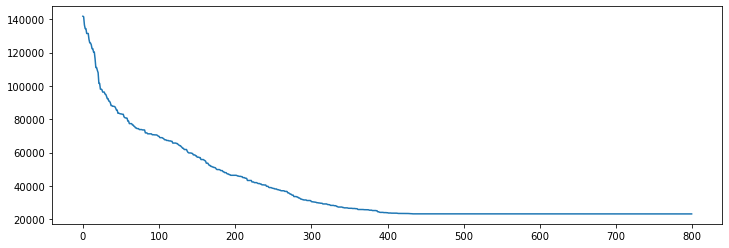

<Figure size 864x576 with 0 Axes>

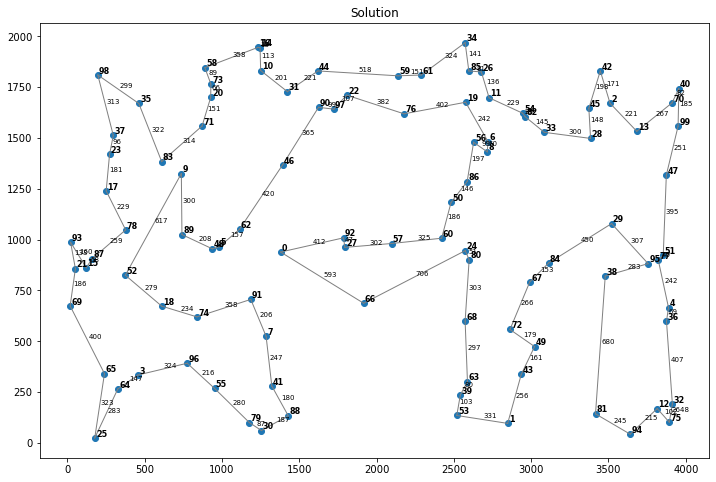

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 24076.350765364023 
 best_permutation: [67 80 24 60 57 27 92 46 90 97 76 19 56 50 86  8  6 82 54 11 26 85 34 61
 59 22 44 31 10 14 16 58 73 20 71  9 89 83 35 98 37 23 17 78 18 52 87 15
 93 21 69 65 25 64  3 96 55 74 48  5 62  0 91  7 41 79 30 88 66 68 63 39
 53  1 43 72 49 81 94 12 75 32 36  4 95 77 51 47 99 70 40 42 33 28 45  2
 13 29 38 84]


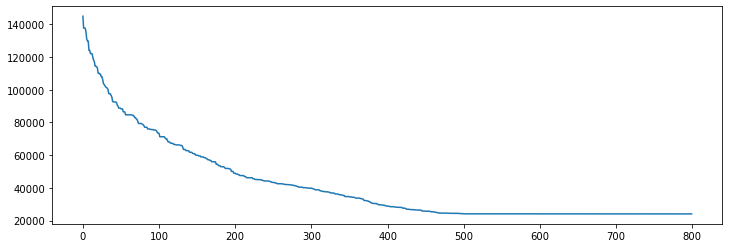

<Figure size 864x576 with 0 Axes>

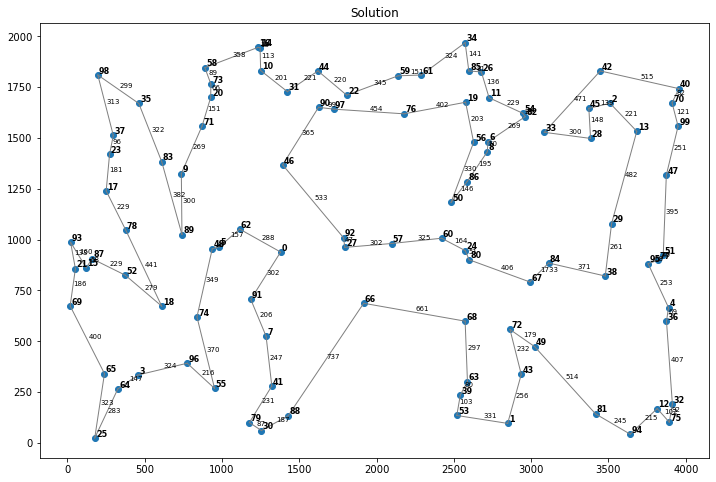

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 22160.498985084556 
 best_permutation: [29 47 99 40 70 13  2 42 45 28 33 82 54 11  6  8 86 50 56 19 26 85 34 61
 59 76 22 97 90 44 31 10 14 16 58 73 20 71 35 98 37 23 17 83  9 89 48  5
 62 46  0 91  7 74 18 52 78 93 87 15 21 69 65 25 64  3 96 55 79 30 88 41
 66 27 92 57 60 24 80 84 67 72 68 63 39 53  1 43 49 81 94 12 75 32 36  4
 51 77 95 38]


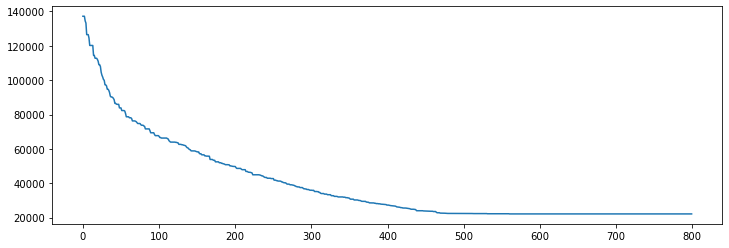

<Figure size 864x576 with 0 Axes>

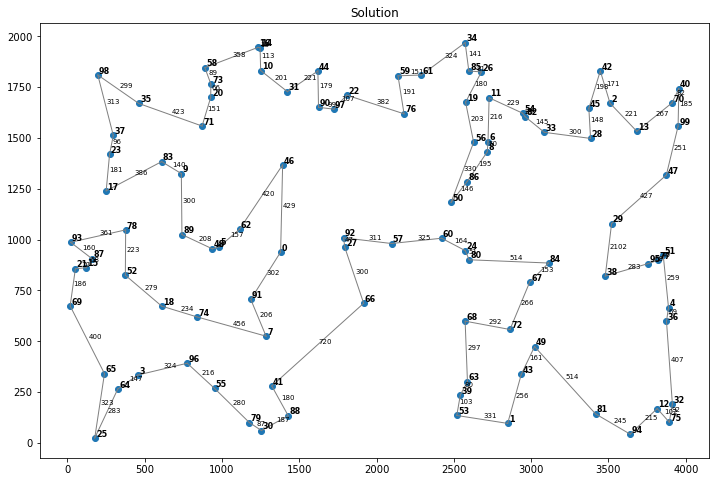

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 22138.34633214801 
 best_permutation: [47 99 40 70 13  2 42 45 28 29 38 84 67 72 68 80 24 60 50 86 56  8  6 33
 82 54 11 19 26 85 34 61 59 76 22 97 90 44 31 14 16 10 46 62  5 48 74 18
 52 89  9 83 71 20 73 58 35 98 37 23 17 78 87 15 93 21 69 65 25 64  3 96
 55 79 30 88 41  7 91  0 92 27 57 66 63 39 53  1 43 49 81 94 12 75 32 36
  4 95 77 51]


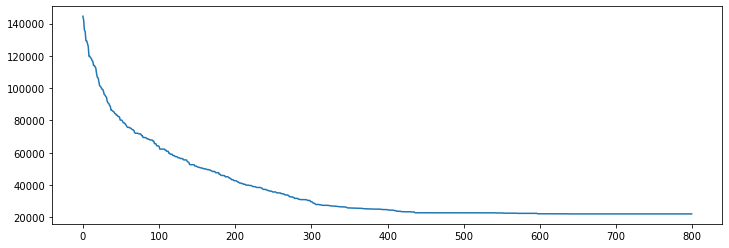

<Figure size 864x576 with 0 Axes>

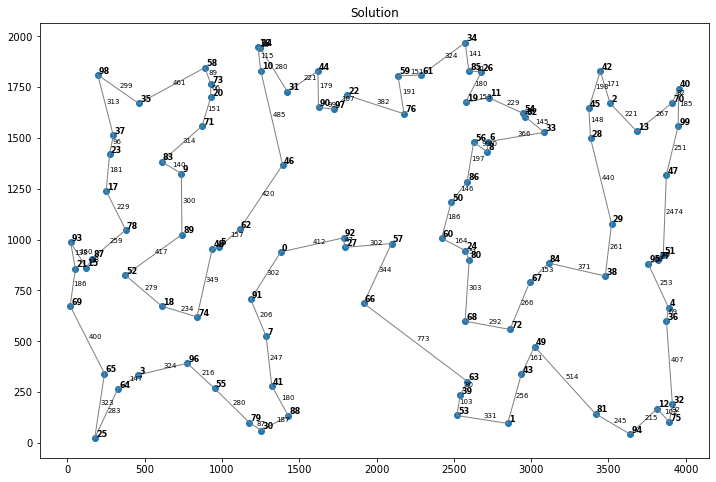

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 22577.145933919666 
 best_permutation: [76 22 97 90 44 31 10 14 16 58 73 20 71  9 83 35 98 37 23 17 78 89 48  5
 74 18 52 87 15 93 21 69 65 25 64  3 96 55 79 30 88 41  7 91  0 62 46 92
 27 66 63 39 53  1 81 94 12 75 32 36  4 38 29 95 77 51 47 99 40 70 13  2
 42 45 28 33 82 54 84 67 49 43 72 68 80 24 60 57 50 86  8  6 56 11 26 34
 85 19 61 59]


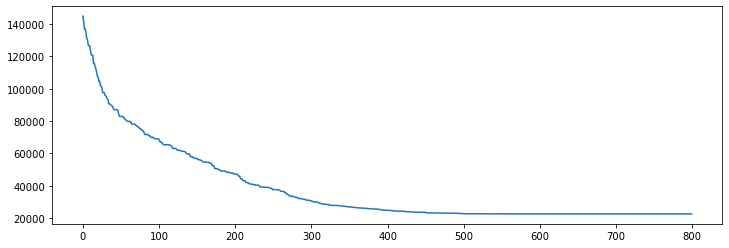

<Figure size 864x576 with 0 Axes>

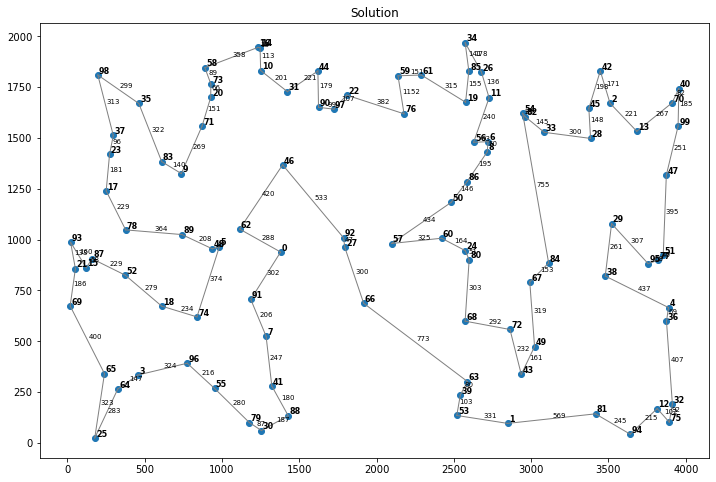

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 21504.807098315974 
 best_permutation: [94 12 75 32 36  4 95 77 51 47 99 40 70 13  2 42 45 28 33 82 54 11 26 34
 85 19  6  8 56 86 50 76 61 59 22 97 44 90 46 31 10 14 16 58 73 20 71  9
 83 35 98 37 23 17 78 52 87 15 93 21 69 65 25 64  3 96 55 79 30 88 41  7
 91 74 18 89 48  5 62  0 92 27 66 57 60 24 80 68 63 39 53  1 43 49 72 67
 84 29 38 81]


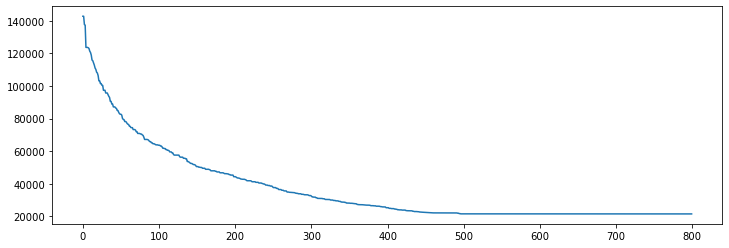

<Figure size 864x576 with 0 Axes>

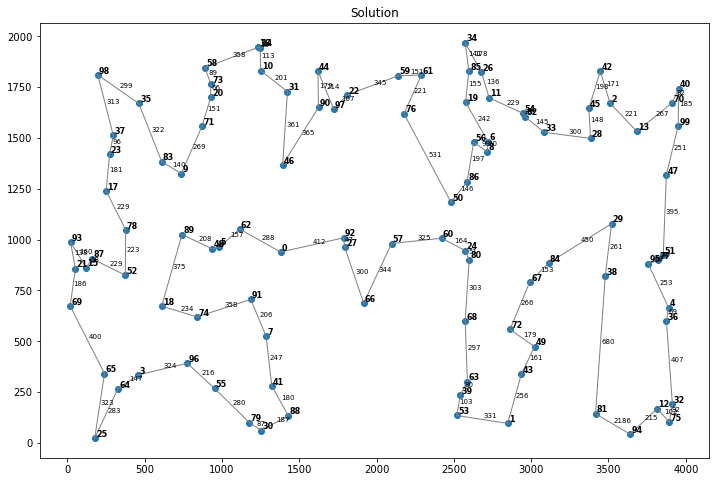

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 22931.837228590546 
 best_permutation: [21 93 17 23 37 98 35 83  9 71 20 73 58 16 14 10 31 44 90 97 22 76 59 61
 34 85 26 19 11 54 82 45 42  2 13 70 40 99 47 29 28 33  6  8 56 86 50 24
 80 72 43 49 67 84 38 95 77 51  4 36 32 75 12 94 81  1 53 39 63 68 60 57
 66 27 92 46  0  7 41 88 30 79 55 91 62  5 48 89 18 74 96  3 64 25 65 69
 52 78 87 15]


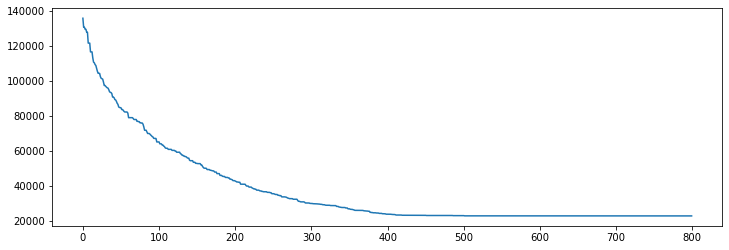

<Figure size 864x576 with 0 Axes>

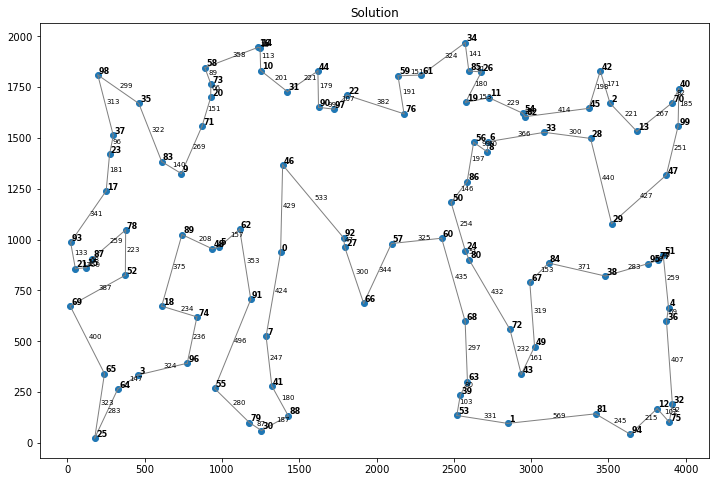

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 22266.379406616725 
 best_permutation: [94 12 75 32 36  4 51 77 95 38 29 47 99 40 70 13  2 42 45 28 33 82 54 11
 26 34 85 19 56  6  8 86 50 76 61 59 22 97 90 44 31 10 14 16 58 73 20 71
  9 46 62  5 48 89 83 35 98 37 23 17 93 21 69 15 87 78 52 18 74 96  3 64
 65 25 55 79 30 88 41  7 91  0 92 27 66 57 60 24 80 68 72 67 84 49 43 63
 39 53  1 81]


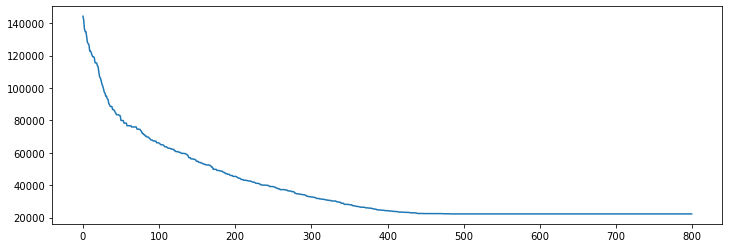

<Figure size 864x576 with 0 Axes>

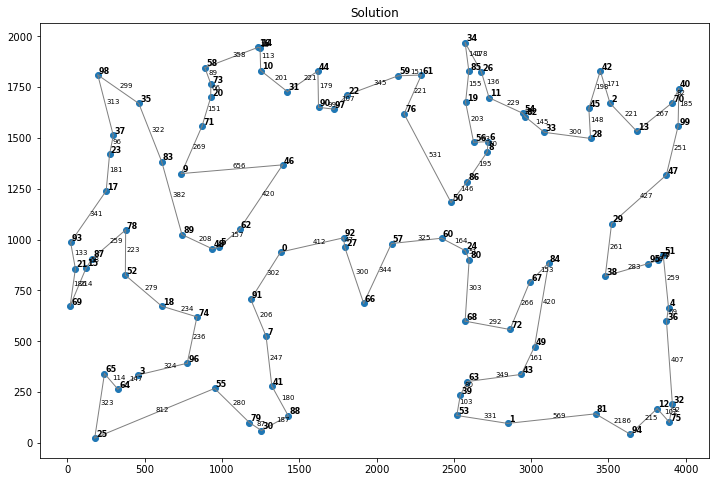

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 22835.65186038938 
 best_permutation: [27 66 41 88 30 79 55 96  7 91 74 18  3 64 25 65 69 21 93 15 87 52 78 17
 23 37 98 35 58 73 20 71 83  9 89 48  5 62  0 46 31 10 16 14 44 90 97 22
 76 59 61 34 85 26 11 19 56  8  6 54 82 33 45 42  2 28 13 70 40 99 47 29
 95 77 51  4 36 38 84 67 72 49 43 12 32 75 94 81  1 53 39 63 68 80 24 86
 50 60 57 92]


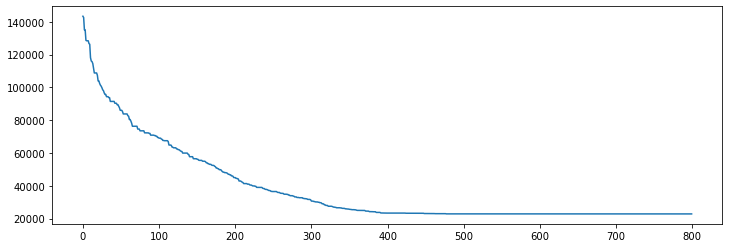

<Figure size 864x576 with 0 Axes>

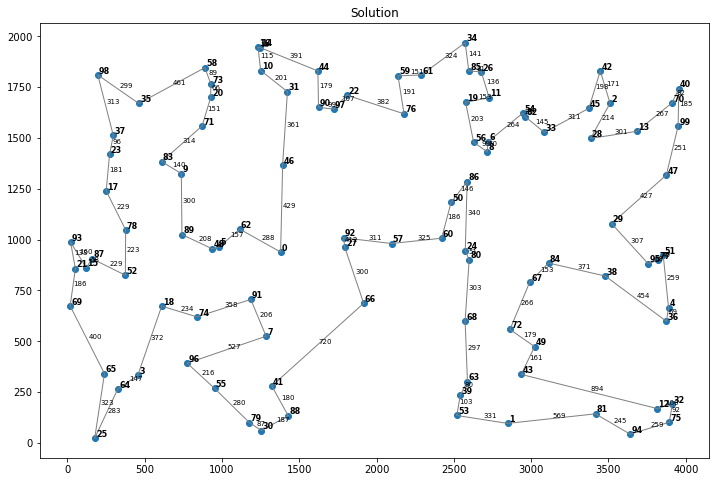

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 22926.394287677595 
 best_permutation: [99 40 70 13  2 42 45 28 33 82 54 11 19 26 85 34 61 59 76 22 97 90 44 31
 14 16 10 46 62 91 74 18 48  5 89  9 83 71 20 73 58 35 98 37 23 17 78 93
 21 69 15 87 52 65 25 64  3 96 55 79 30 88 41  7  0 92 27 66 57 60 50 56
  6  8 86 24 80 68 72 67 84 29 38 49 43 63 39 53  1 81 94 12 75 32 36  4
 95 77 51 47]


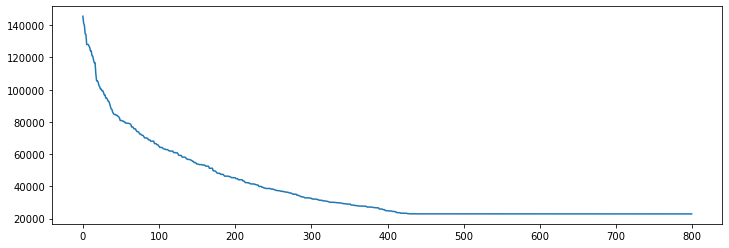

<Figure size 864x576 with 0 Axes>

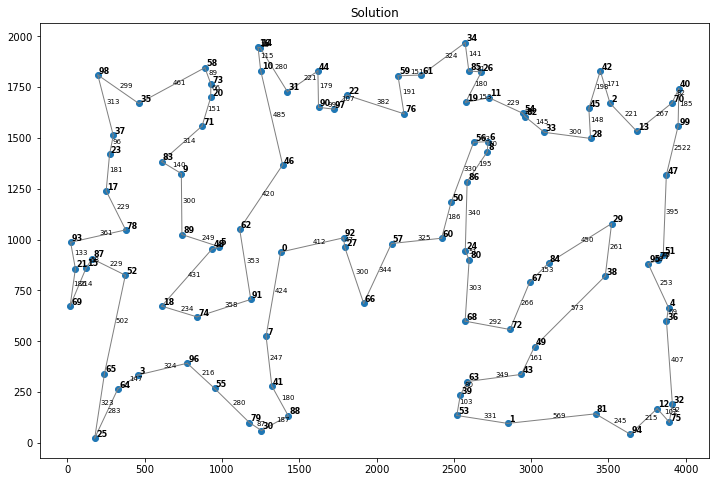

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 23555.486424758037 
 best_permutation: [23 83  9 89 48  5 62 91  7 41 74 18 52 78 17 93 87 15 21 69 65 25 64  3
 96 55 79 30 88 53 39 63  1 43 72 68 80 24 84 67 49 81 94 12 75 32 36  4
 38 29 95 77 51 47 99 40 70 13  2 42 45 28 33 82 54 11 19 26 85 34 61 59
 22 76 56  6  8 86 50 60 57 66 27 92  0 46 90 97 44 31 10 14 16 58 73 20
 71 35 98 37]


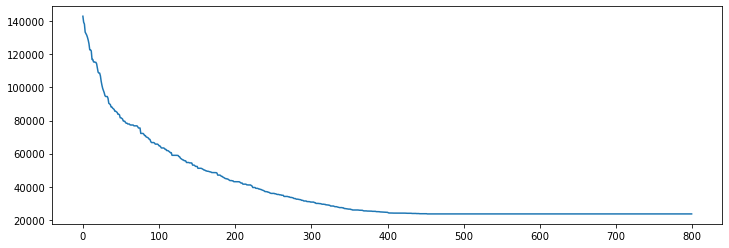

<Figure size 864x576 with 0 Axes>

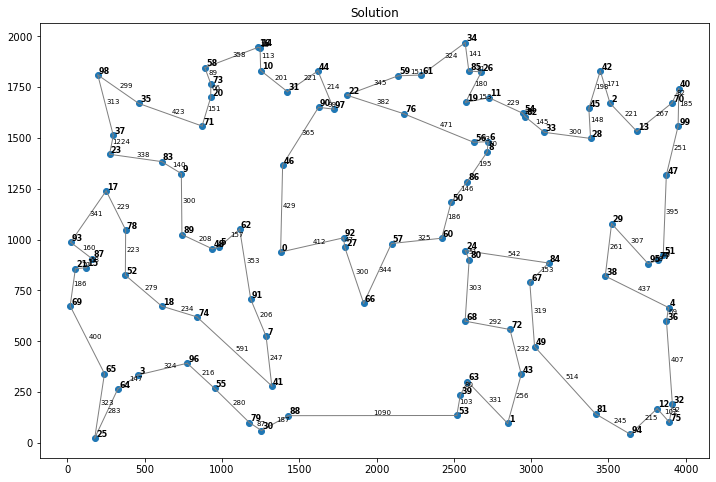

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 23022.548349873974 
 best_permutation: [23 37 98 35 71 20 73 58 16 14 10 31 44 97 22 76 59 61 34 85 26 19 11 54
 82 45 42  2 13 70 40 99 47 51 77 95 38  4 36 32 75 12 94 81 49 43  1 53
 39 63 72 67 84 29 28 33  6  8 56 86 50 24 80 68 60 57 66 27 92 90 46  0
 62  5 48 89  9 83 78 52 18 74 91  7 41 88 30 79 55 96  3 64 25 65 69 21
 15 87 93 17]


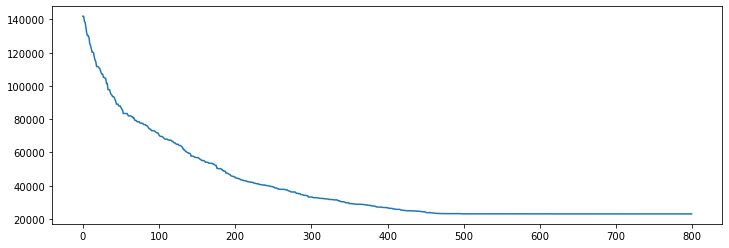

<Figure size 864x576 with 0 Axes>

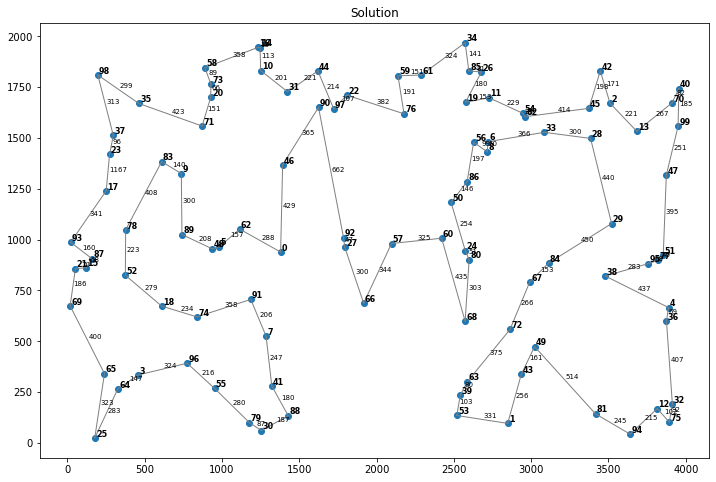

In [16]:
dist_matr = [kroA100_dist]
coords = kroA100_coords
num = [100]
pop_size = [1000]
cross_prob = [0.975, 0.95, 0.9, 0.85]
mut_prob = [0.2, 0.25, 0.3]
num_of_iter = [800]
crossover = [CX]
mutation = [reverse_sequence_mutation]

for (n, d_matrix, pop, cross, mut, n_it, cro, mu) in itertools.product(num, dist_matr, 
                                            pop_size, cross_prob, mut_prob, num_of_iter, crossover, mutation):
    best_p, costs = SGA(n, d_matrix, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", tsp_objective_function(d_matrix, best_p), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    plot_path(d_matrix, coords, best_p)

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 24842.615872647686 
 best_permutation: [11 26 85 34 61 59 22 97 90 44 31 46 62  0 91  5 48 89  9 83 71 20 73 10
 14 16 58 35 98 37 23 17 78 93 21 69 15 87 52 18 65 25 64  3 96 74  7 55
 79 30 41 88 53 39  1 43 49 72 63 68 66 27 92 57 76 19  6  8 56 86 50 60
 24 80 67 84 38 81 94 12 75 32 36  4 95 77 51 47 99 40 70 13  2 42 45 28
 29 33 82 54]


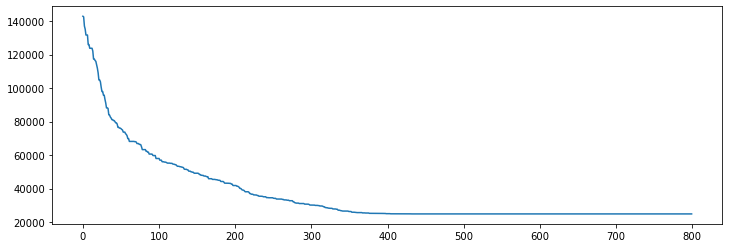

<Figure size 864x576 with 0 Axes>

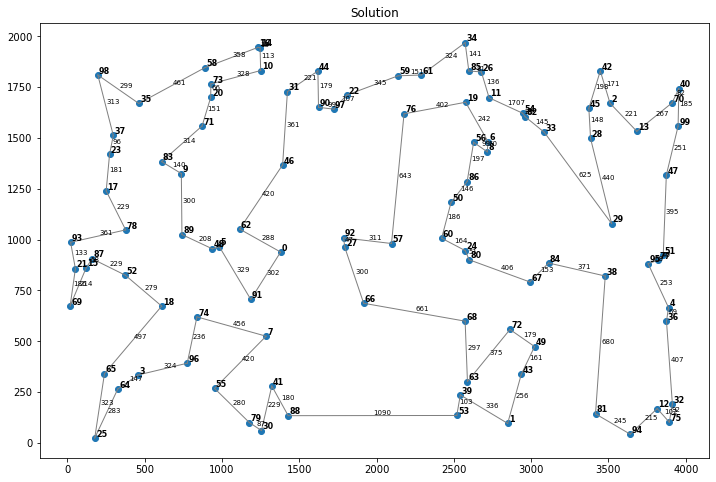

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.225 
 number_of_iterations = 800 
 tsp_objective_function: 22710.376152098852 
 best_permutation: [48 89  9 83 35 98 37 23 17 93 78 52 87 15 21 69 65 25 64  3 18 74 96 55
 79 30 88 41  7 66 27 92 57 68 63 39 53  1 81 94 12 75 32 36  4 95 77 51
 47 99 40 70 13  2 42 45 28 29 38 84 67 49 43 72 80 24 60 50 86 56  8  6
 33 82 54 11 26 34 85 19 61 59 76 22 97 90 44 31 46 10 14 16 58 73 20 71
 62  0 91  5]


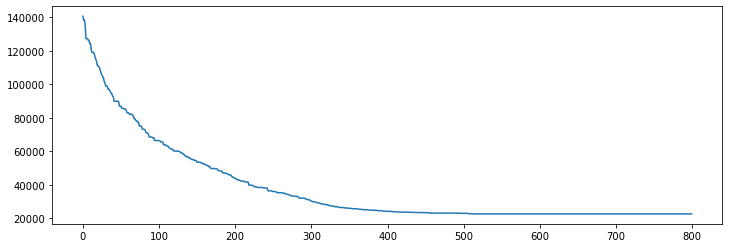

<Figure size 864x576 with 0 Axes>

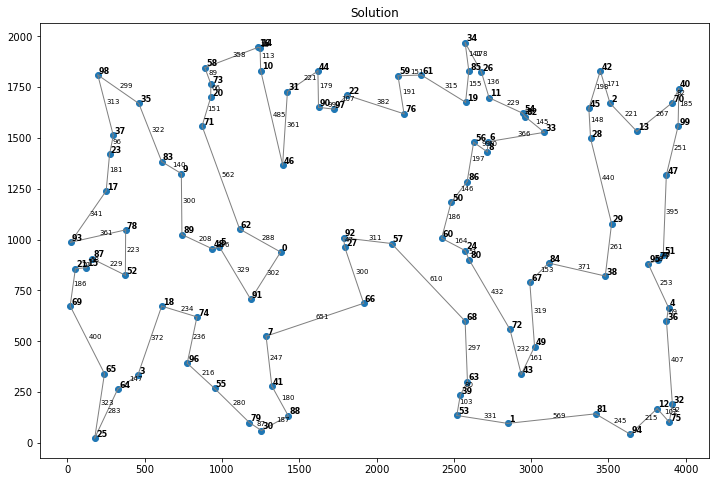

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 23308.626133962403 
 best_permutation: [36  4 38 95 77 51 47 99 40 70 13  2 42 45 28 29 33 82 54  6  8 56 11 26
 34 85 19 61 59 76 86 50 60 57 27 92  0 46 90 97 22 44 31 10 14 16 58 73
 20 71  9 62  5 48 89 83 35 98 37 23 17 78 52 87 15 93 21 69 65 25 64  3
 18 74 96 55 79 30 88 41  7 91 66 53 39 63 68 80 24 84 67 72 49 43  1 81
 94 12 75 32]


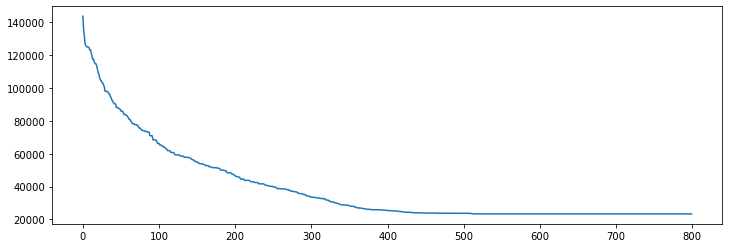

<Figure size 864x576 with 0 Axes>

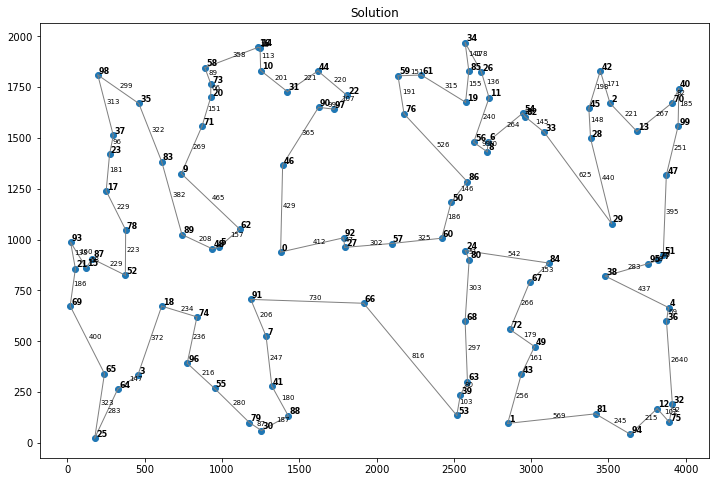

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.275 
 number_of_iterations = 800 
 tsp_objective_function: 22386.374632979005 
 best_permutation: [71 20 73 58 16 14 10 31 44 90 97 22 76 59 61 34 85 26 11 19 56  8  6 54
 82 33 28 45 42  2 13 70 40 99 47 29 38 95 77 51  4 36 32 75 12 94 81  1
 43 49 84 67 72 63 53 39 68 80 24 86 50 60 57 92 27 66  7 41 88 30 79 55
 96  3 64 25 65 69 21 93 15 87 52 18 78 17 23 37 98 35 83  9 89 48  5 62
 74 91  0 46]


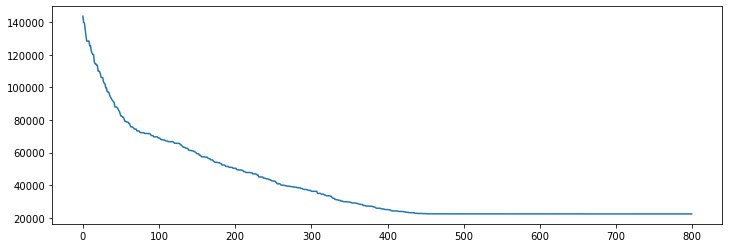

<Figure size 864x576 with 0 Axes>

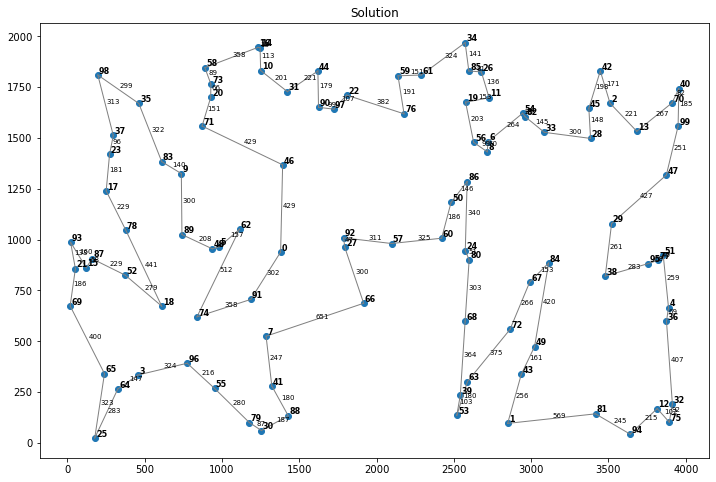

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 23526.31334550806 
 best_permutation: [33 82 54 11 26 85 34 61 59 22 44 31 14 16 10 46 62  5 48 74 18 89  9 83
 71 20 73 58 35 98 37 23 17 78 52 87 15 93 21 69 65 25 64  3 96 55 79 30
 88 41  7 91  0 90 97 76 19 56  6  8 86 50 60 57 92 27 66 53 39 63 72 68
 80 24 67 49 43  1 81 94 12 75 32 36  4 51 77 95 38 84 29 47 99 40 70 13
  2 42 45 28]


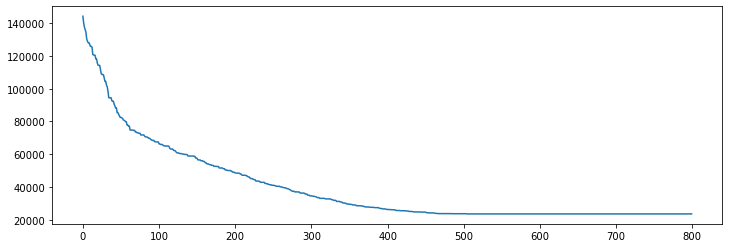

<Figure size 864x576 with 0 Axes>

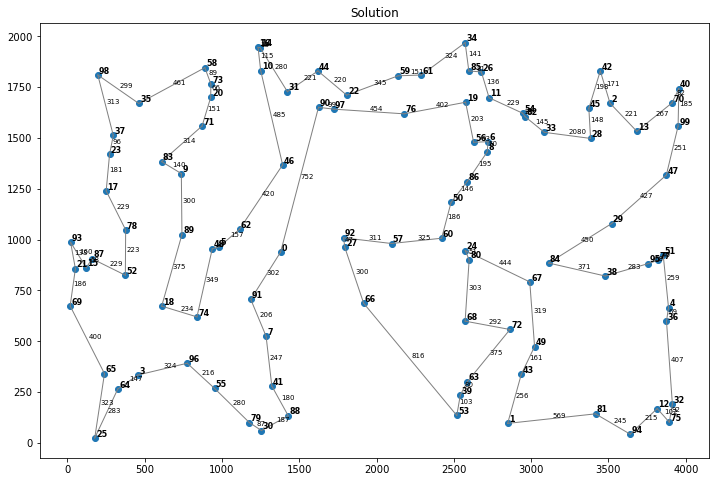

 population_size = 1000 
 crossover_probability = 0.9625 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 22036.14631488366 
 best_permutation: [50 60 57 66 27 92 46  0 62  5 48 91  7 41 88 30 79 55 96 74 18 89 52  3
 64 25 65 69 21 93 15 87 78 17 23 37 98 35 83  9 71 20 73 58 16 14 10 31
 44 90 97 22 76 59 61 34 85 26 11 19 56  8  6 54 82 33 28 45 42  2 13 70
 40 99 47 29 84 38 95 77 51  4 36 32 75 12 94 81 49 67 72 43  1 53 39 63
 68 80 24 86]


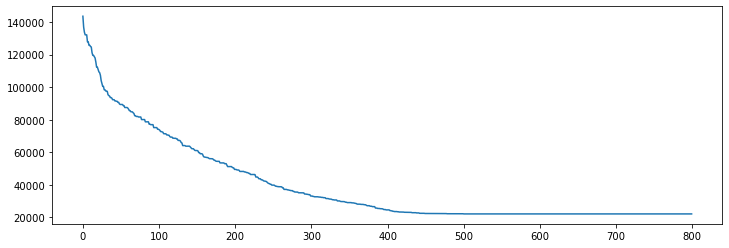

<Figure size 864x576 with 0 Axes>

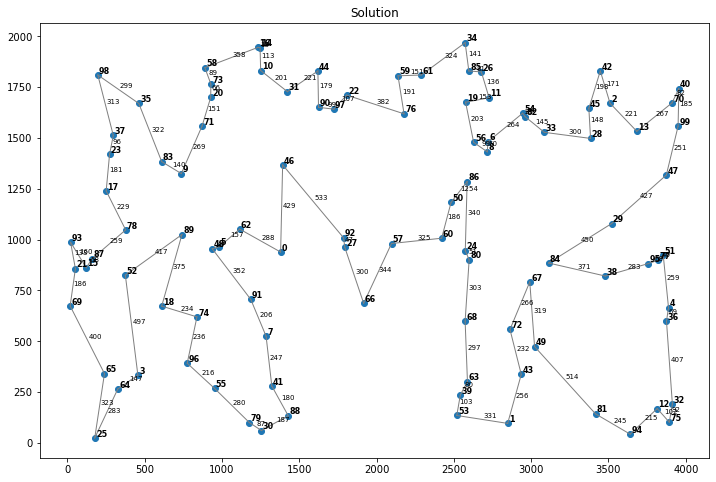

 population_size = 1000 
 crossover_probability = 0.9625 
 mutation_probability = 0.225 
 number_of_iterations = 800 
 tsp_objective_function: 21766.57604471778 
 best_permutation: [19 56 86  8  6 54 82 33 28 45 42  2 13 70 40 99 47 29 84 67 38 95 77 51
  4 36 32 75 12 94 81 49 72 43  1 53 39 63 68 80 24 50 60 57 66 27 92 46
 62  5 48 89 18 74 91  0  7 41 88 30 79 55 96  3 64 25 65 69 21 93 15 87
 52 78 17 23 37 98 35 83  9 71 20 73 58 16 14 10 31 44 90 97 22 76 59 61
 34 85 26 11]


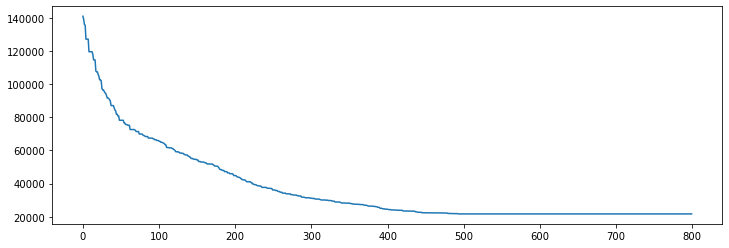

<Figure size 864x576 with 0 Axes>

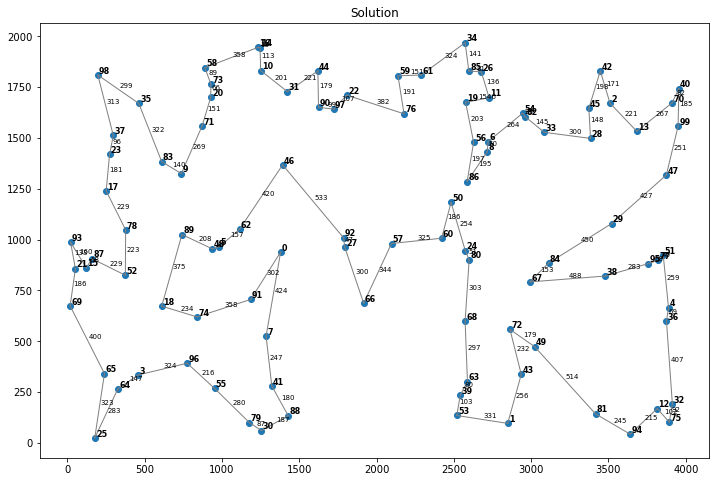

 population_size = 1000 
 crossover_probability = 0.9625 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 22746.906742328785 
 best_permutation: [31 10 14 16 58 73 20 71 35 98 37 23 17 93 87 15 21 69 65 25 64  3 52 78
 83  9 89 48 18 74 96 55 79 30 88 41  7 91  5 62  0 46 92 27 66 57 60 68
 72 63 39 53  1 43 49 81 94 12 75 32 36  4 95 77 51 47 99 40 70 13  2 42
 45 54 82 33 28 29 38 84 67 80 24 50 86 56  8  6 11 26 34 85 19 61 59 76
 22 97 90 44]


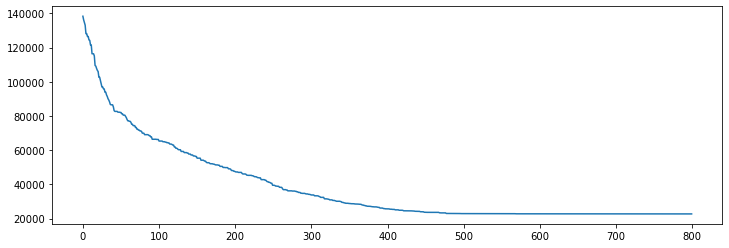

<Figure size 864x576 with 0 Axes>

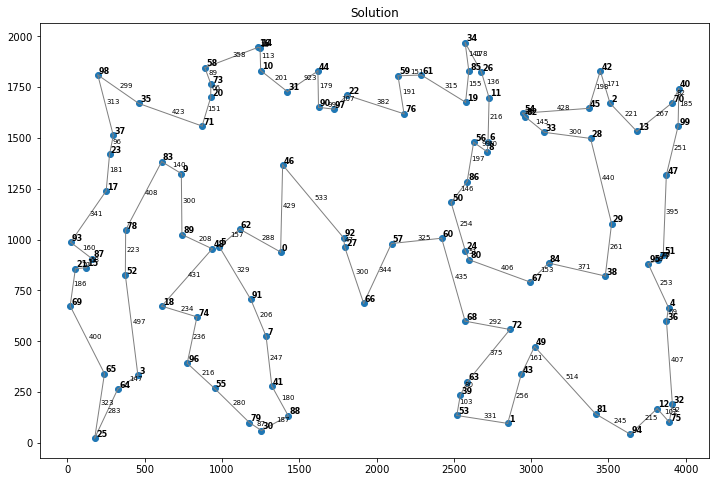

 population_size = 1000 
 crossover_probability = 0.9625 
 mutation_probability = 0.275 
 number_of_iterations = 800 
 tsp_objective_function: 21929.544631983987 
 best_permutation: [10 14 16 58 73 20 71 35 98 37 23 17 93 87 15 21 69 65 25 64  3 96 55 79
 30 88 41  7 91 74 18 52 78 83  9 89 48  5 62  0 46 92 27 66 57 68 63 39
 53  1 43 49 81 94 12 75 32 36  4 95 77 51 47 99 40 70 13  2 42 45 28 29
 38 84 67 72 80 24 60 50 86 56  8  6 33 82 54 11 26 34 85 19 61 59 76 22
 97 90 44 31]


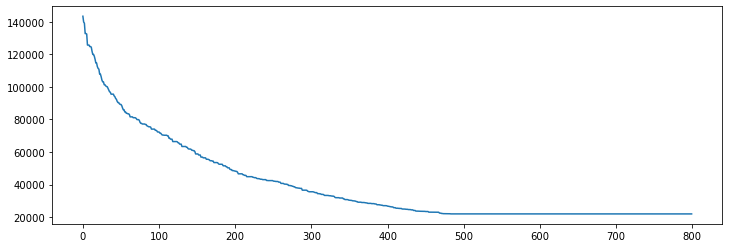

<Figure size 864x576 with 0 Axes>

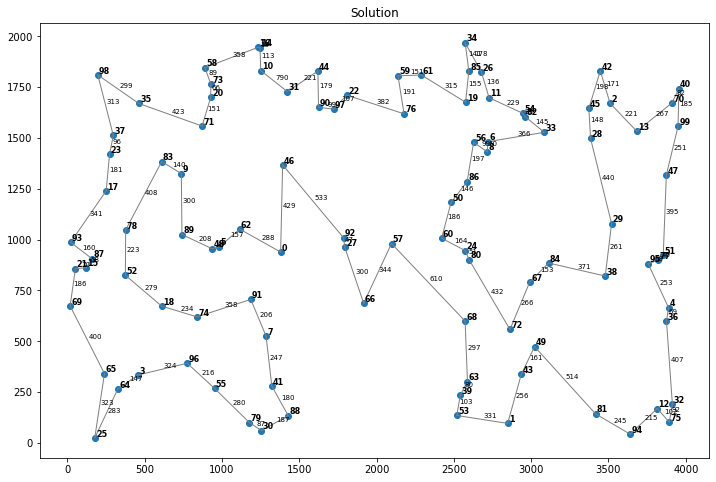

 population_size = 1000 
 crossover_probability = 0.9625 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 22605.096798406765 
 best_permutation: [32 36  4 51 77 95 38 29 47 99 40 70 13 28  2 42 45 33 82 54  6  8 56 11
 26 34 85 19 61 59 76 22 97 90 44 31 10 14 16 58 73 20 71 83 35 98 37 23
 17 93 87 15 21 69 65 25 64  3 52 78 18 74 96 55 79 30 88 41  7 91  5 48
 89  9 62  0 46 92 27 66 57 60 50 86 24 80 68 72 67 84 49 63 39 53  1 43
 81 94 12 75]


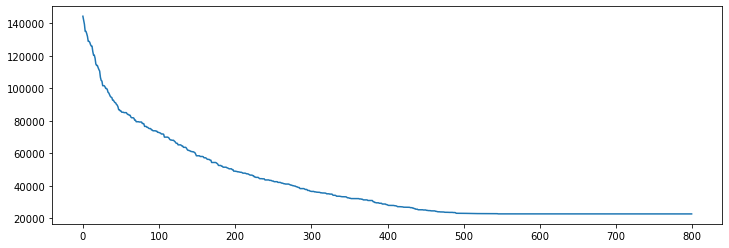

<Figure size 864x576 with 0 Axes>

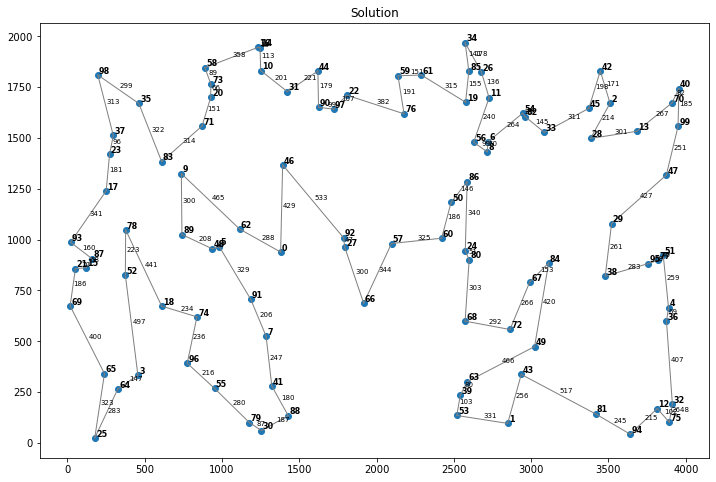

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 22848.03594872209 
 best_permutation: [74 41 88 30 79 55 96  3 64 25 65 69 21 15 87 93 17 23 37 98 35 83  9 71
 20 73 58 16 14 10 31 44 97 22 76 59 61 34 85 26 11 19 56  8  6 54 82 33
 28 45 42  2 13 70 40 99 47 29 38 95 77 51  4 36 32 75 12 94 81  1 53 39
 63 68 72 43 49 84 67 80 24 86 50 60 57 90 46  0 92 27 66  7 91 62  5 48
 89 78 52 18]


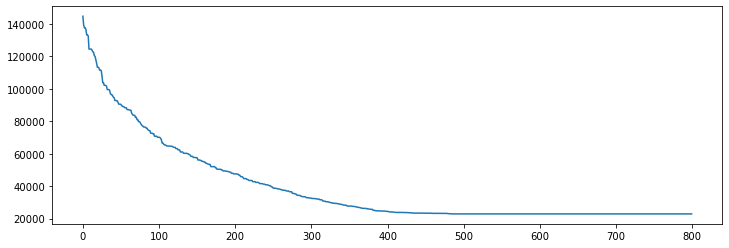

<Figure size 864x576 with 0 Axes>

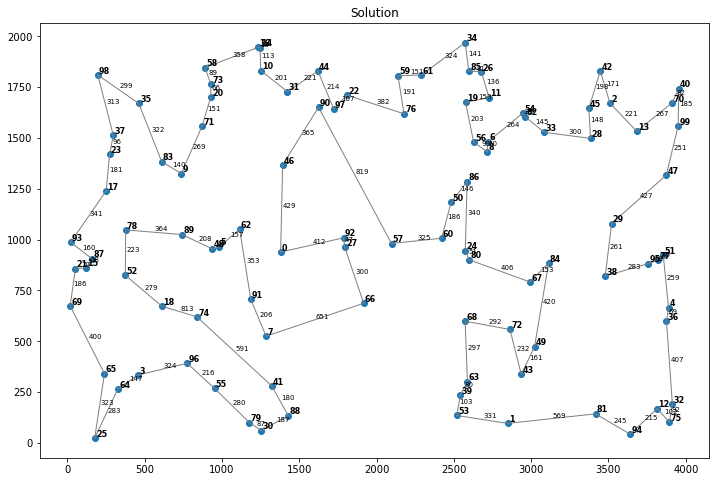

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.225 
 number_of_iterations = 800 
 tsp_objective_function: 22899.18301250155 
 best_permutation: [99 70 40  2 42 45 33 82 54  8 86 56  6 11 26 34 85 19 61 59 76 22 97 90
 44 31 10 14 16 58 73 20 71 35 98 37 23 17 78 87 15 93 21 69 65 25 64  3
 96 55 79 30 88 41  7 91 74 18 52 83  9 89 48  5 62  0 46 92 27 66 57 60
 50 24 80 68 72 63 39 53  1 43 81 94 12 75 32 36  4 51 77 95 38 49 67 84
 29 28 13 47]


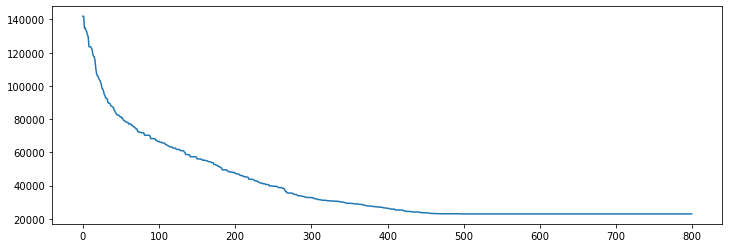

<Figure size 864x576 with 0 Axes>

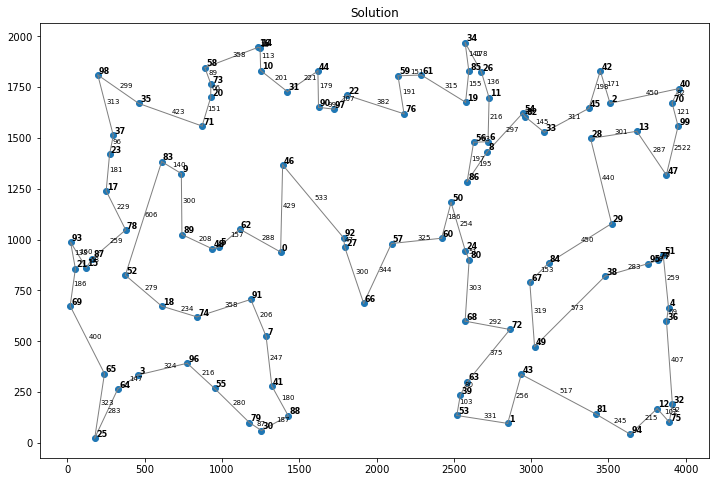

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 22702.69204393544 
 best_permutation: [83 71 20 73 58 16 14 10 31 46 90 44 97 22 76 59 61 34 85 26 19 11 54 82
 45 42  2 13 70 40 99 47 51 77 95  4 36 32 75 12 94 81 43 49 72 67 84 38
 29 28 33  6  8 56 86 50 60 24 80 68 63  1 53 39 66 57 27 92  0 62  5 48
 89  9 78 52 18 74 91  7 41 88 30 79 55 96  3 64 25 65 69 21 15 87 93 17
 23 37 98 35]


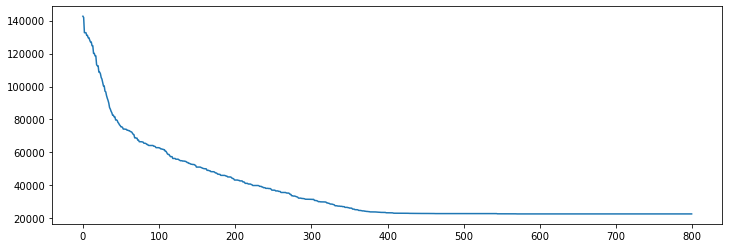

<Figure size 864x576 with 0 Axes>

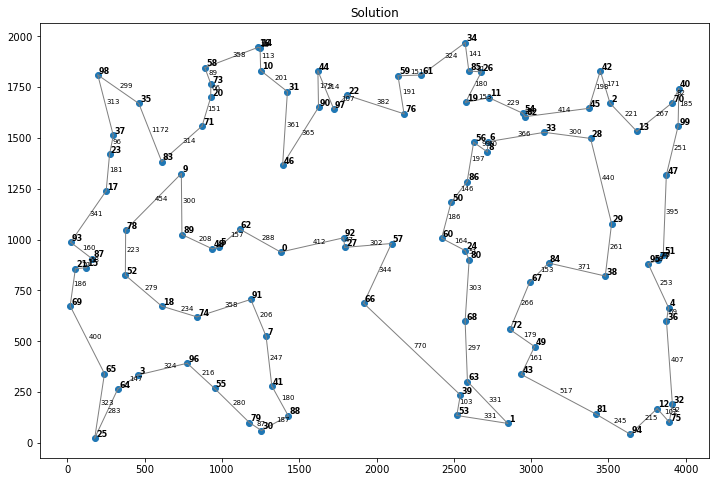

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.275 
 number_of_iterations = 800 
 tsp_objective_function: 23618.468369886665 
 best_permutation: [83 17 23 37 98 35 20 73 58 16 14 10 31 44 90 97 22 59 76 50 86  8  6 56
 61 34 85 26 19 11 54 82 33 28 45 42  2 13 70 40 99 47 29 84 38 95 77 51
  4 36 32 75 12 94 81  1 53 39 63 43 49 67 72 68 80 24 60 57 66 27 92  0
 91  5 48 89 18 74  7 41 88 30 79 55 96  3 64 25 65 69 21 93 15 87 52 78
  9 62 46 71]


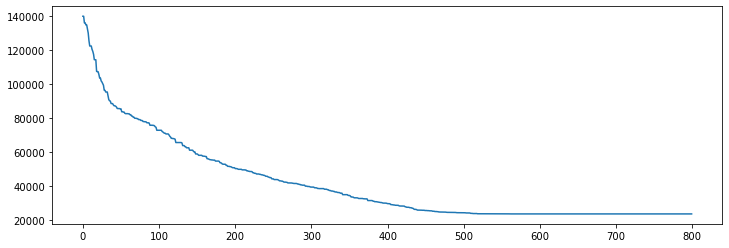

<Figure size 864x576 with 0 Axes>

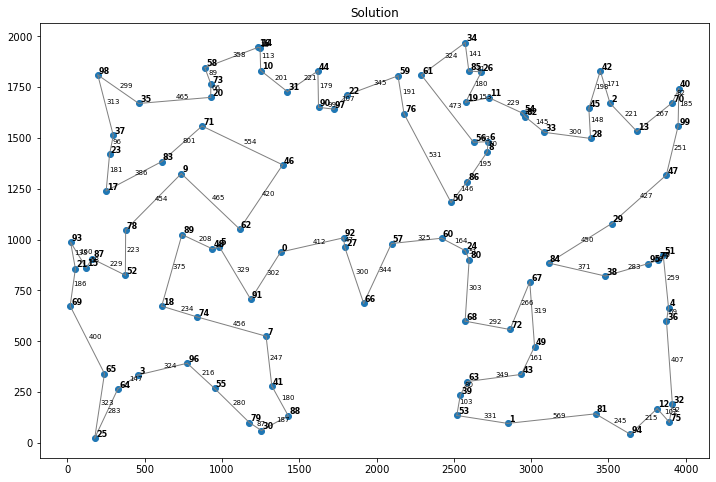

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 22144.42044505045 
 best_permutation: [48  5 62 74 18 52 87 15 93 21 69 65 25 64  3 96 55 79 30 88 41  7 91  0
 92 27 57 66 63 39 53  1 43 81 94 12 75 32 36  4 95 77 51 47 99 40 70 13
  2 42 45 54 82 33 28 29 38 84 67 49 72 68 80 24 60 50 86  8  6 56 19 11
 26 85 34 61 59 76 22 97 44 90 46 31 10 14 16 58 73 20 71  9 83 35 98 37
 23 17 78 89]


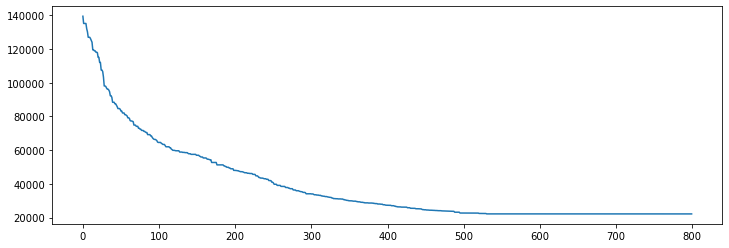

<Figure size 864x576 with 0 Axes>

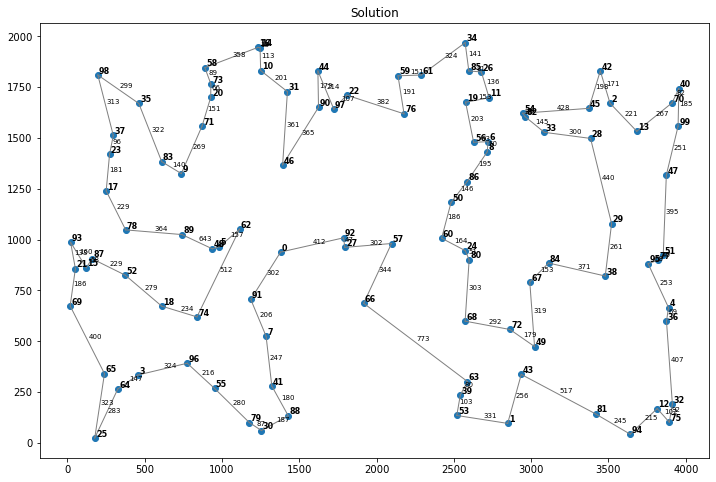

In [17]:
dist_matr = [kroA100_dist]
coords = kroA100_coords
num = [100]
pop_size = [1000]
cross_prob = [0.975, 0.9625, 0.95]
mut_prob = [0.2, 0.225, 0.25, 0.275, 0.3]
num_of_iter = [800]
crossover = [CX]
mutation = [reverse_sequence_mutation]

for (n, d_matrix, pop, cross, mut, n_it, cro, mu) in itertools.product(num, dist_matr, 
                                            pop_size, cross_prob, mut_prob, num_of_iter, crossover, mutation):
    best_p, costs = SGA(n, d_matrix, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", tsp_objective_function(d_matrix, best_p), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    plot_path(d_matrix, coords, best_p)

## OBX - Order based crossover

In [40]:
def OBX(P1, P2):
    O1 = np.zeros(P1.shape[0]) - 1
    num_of_positions = np.random.choice(range(P1.shape[0]), size=1, replace=False)
    positions = np.random.choice(range(P1.shape[0]), size=num_of_positions, replace=False)
#     print(np.sort(positions))
    used = set()
    for i in positions:
        O1[i] = P2[i]
        used.add(P2[i])
    list_to_add = [P1[i] for i in range(P1.shape[0]) if P1[i] not in used]
    pointer = 0
    for i in range(P1.shape[0]):
        if O1[i] == -1:
            O1[i] = list_to_add[pointer]
            pointer += 1

    O2 = np.zeros(P1.shape[0]) - 1
    num_of_positions = np.random.choice(range(P1.shape[0]), size=1, replace=False)
    positions = np.random.choice(range(P1.shape[0]), size=num_of_positions, replace=False)
#     print(np.sort(positions))
    used = set()
    for i in positions:
        O2[i] = P1[i]
        used.add(P1[i])
    list_to_add = [P2[i] for i in range(P1.shape[0]) if P2[i] not in used]
    pointer = 0
    for i in range(P1.shape[0]):
        if O2[i] == -1:
            O2[i] = list_to_add[pointer]
            pointer += 1
    return O1, O2

In [41]:
P1 = np.array([1,2,3,10,4,5,6,7,11,8,9])
P2 = np.array([4, 5, 2, 10, 1, 8, 7, 6, 11, 9, 3])
OBX(P1, P2)

(array([ 4.,  2.,  5., 10.,  1.,  8.,  7.,  6., 11.,  9.,  3.]),
 array([ 4.,  5.,  3.,  2., 10.,  1.,  8.,  7.,  6., 11.,  9.]))

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 22360.485116915548 
 best_permutation: [36  4 95 77 51 47 99 40 70 13  2 42 45 28 33 82 54 11 19 26 85 34 61 59
 76 22 97 90 44 31 10 14 16 58 73 20 71  9 83 35 98 37 23 17 78 52 87 15
 93 21 69 65 25 64  3 96 74 18 89 48  5 91 55 79 30 88 41  7  0 62 46 92
 27 66 57 60 80 24 50 86 56  6  8 29 38 84 67 68 63 39 53  1 43 72 49 81
 94 12 75 32]


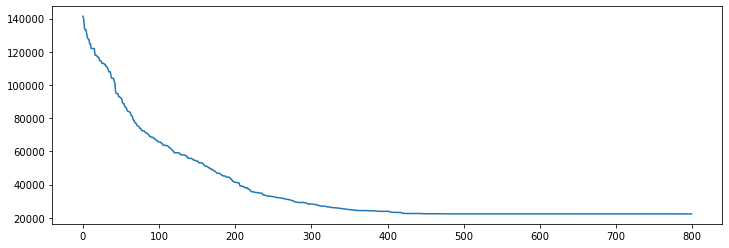

<Figure size 864x576 with 0 Axes>

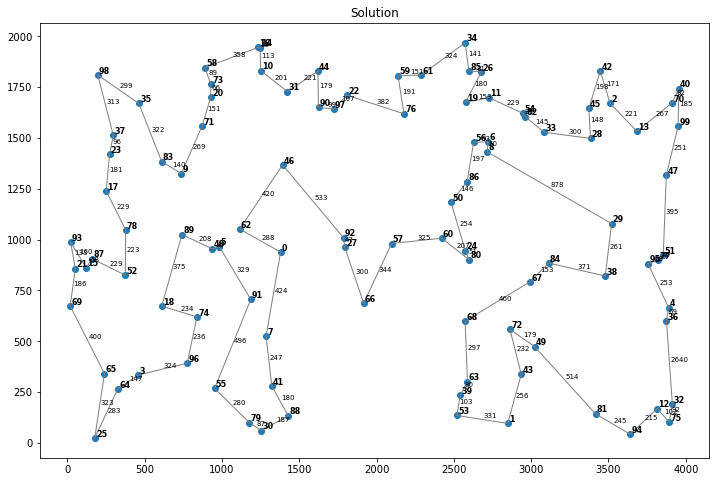

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 23187.450880596145 
 best_permutation: [46  9 83 89 18 74 48  5 62  0 91  7 41 88 30 79 55 96  3 64 25 65 69 21
 93 15 87 52 78 17 23 37 98 35 71 20 73 58 16 14 10 31 44 22 59 61 34 85
 26 19 11 54 82 33 84 38 29 28 45 42  2 13 70 40 99 47 51 77 95  4 36 32
 75 12 94 81 49 67 72 43  1 53 39 63 68 80 24 60 66 27 92 57 50 86  8  6
 56 76 97 90]


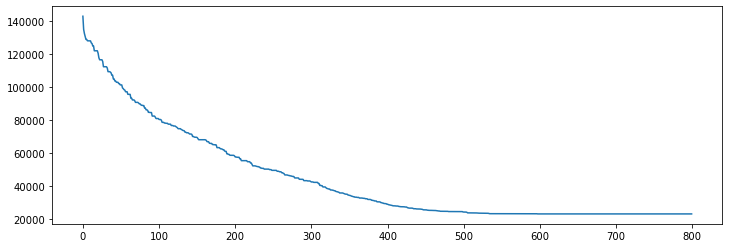

<Figure size 864x576 with 0 Axes>

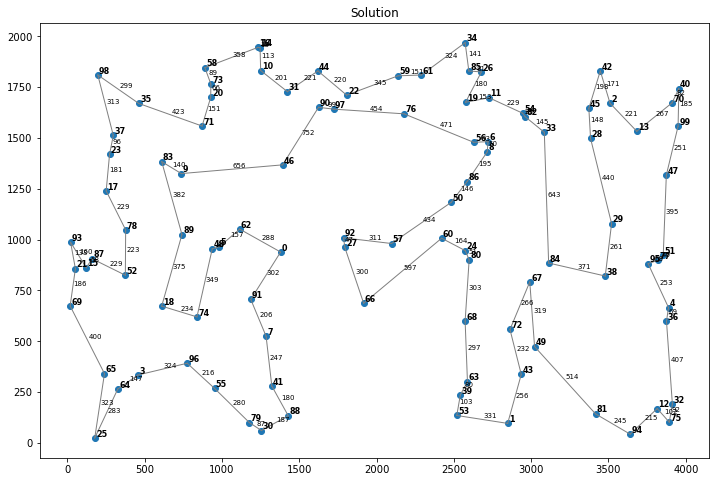

 population_size = 1000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 23739.18264766636 
 best_permutation: [69 21 15 87 93 78 52 18 89 48  5 62 46 71  9 83 17 23 37 98 35 20 73 58
 16 14 10 31 44 90 97 22 59 61 76 92 27 57 60 24 80 67 84 38 29 50 86  8
  6 56 19 85 34 26 11 54 82 33 28 45 42  2 13 70 40 99 47 51 77 95  4 36
 32 75 12 94 81 49 72 43  1 53 39 63 68 66  0 91 74  7 41 88 30 79 55 96
  3 64 25 65]


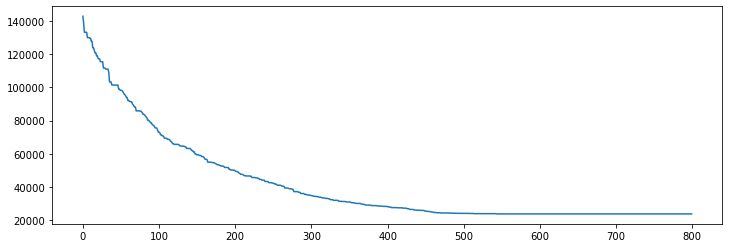

<Figure size 864x576 with 0 Axes>

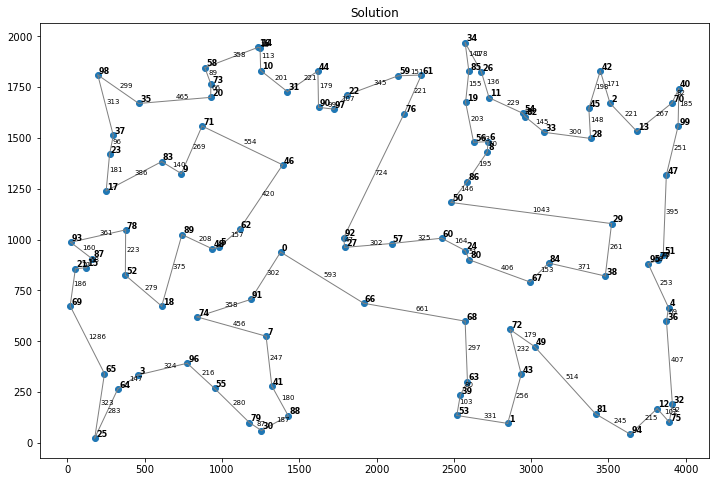

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 22247.09278190526 
 best_permutation: [78 17 23 37 98 35 83  9 71 20 73 58 16 14 10 46 31 44 90 97 22 76 59 61
 34 85 26 11 19  6  8 54 82 33 28 45 42  2 13 70 40 99 47 29 95 77 51  4
 36 32 75 12 94 81 38 84 67 72 49 43  1 53 39 63 68 80 24 86 56 50 60 57
 66 27 92  0 91  7 41 88 30 79 55 96  3 64 25 65 18 74 62  5 48 89 52 87
 15 69 21 93]


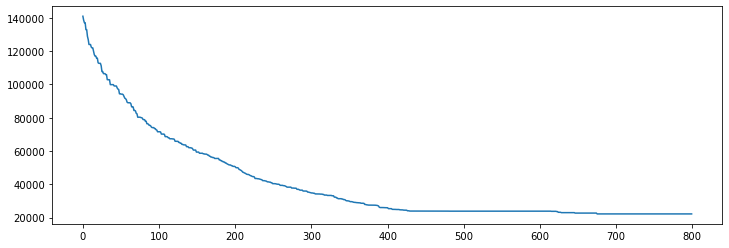

<Figure size 864x576 with 0 Axes>

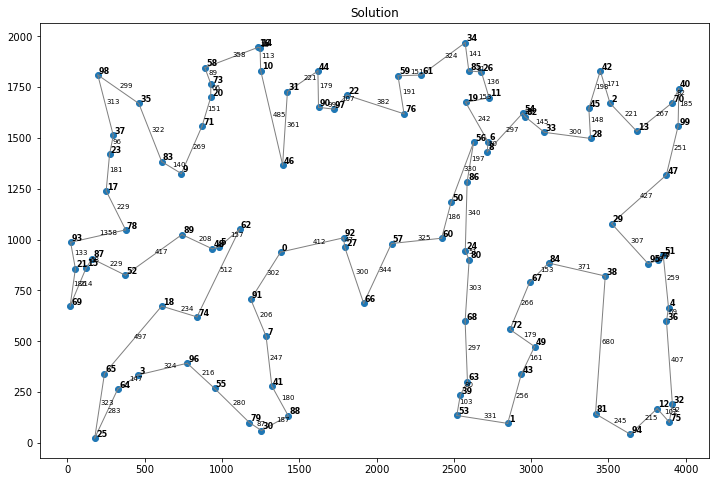

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 22764.072969160654 
 best_permutation: [30 79 55 96 25 65 64  3 18 74 89 78 52 87 15 69 21 93 17 23 37 98 35 20
 73 58 16 14 10 31 44 90 97 22 59 61 76 50 86 56  8  6 11 19 85 34 26 54
 82 33 28 45 42  2 13 70 40 99 47 51 77 95 29 38  4 36 32 75 12 94 81 84
 67 72 49 43  1 53 39 63 68 80 24 60 57 66 27 92 46 71 83  9 48  5 62  0
 91  7 41 88]


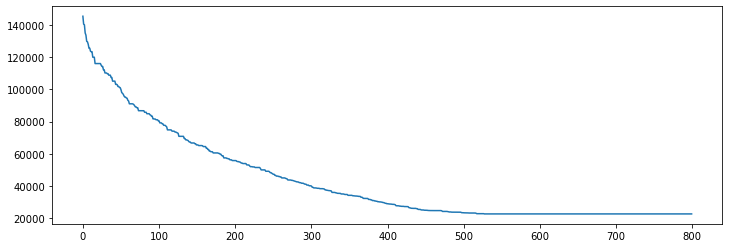

<Figure size 864x576 with 0 Axes>

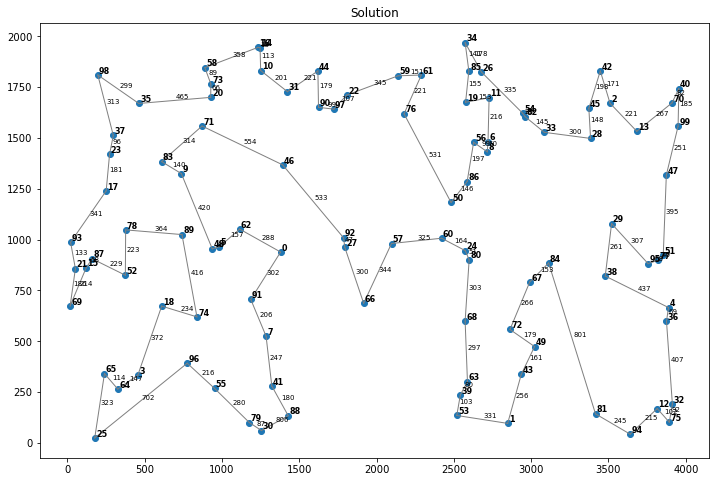

 population_size = 1000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 22990.62170209388 
 best_permutation: [90 97 22 44 31 10 14 16 58 73 20 71  9 83 35 98 37 23 17 93 87 15 21 69
 65 25 64  3 18 52 78 89 48 74 96 55 79 30 88 41  7 91  5 62  0 27 66 63
 39 53  1 43 81 94 12 75 32 36  4 51 77 95 38 49 72 68 67 84 29 47 99 40
 70 13  2 42 45 28 33 82 54 11 26 85 34 61 59 76 19  6  8 56 86 50 24 80
 60 57 92 46]


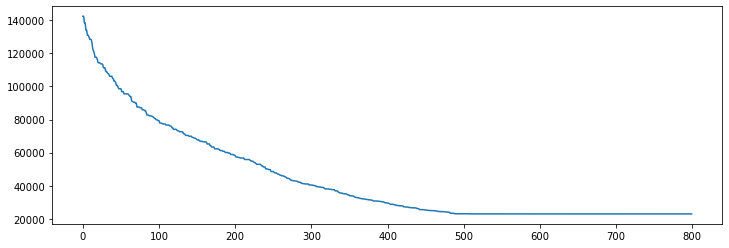

<Figure size 864x576 with 0 Axes>

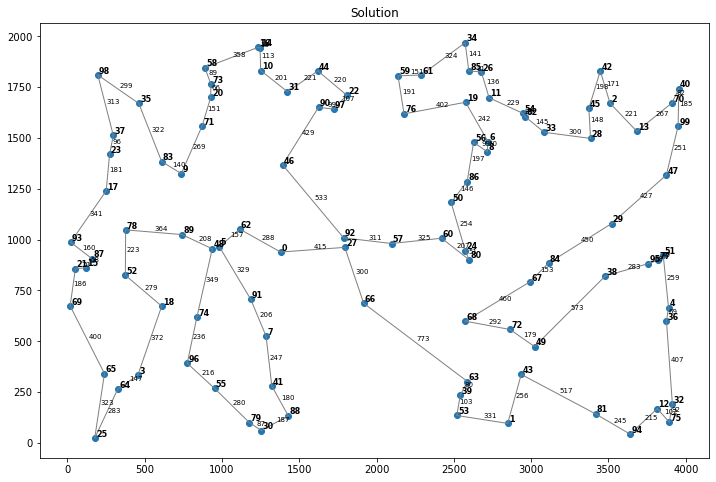

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 24040.6753566606 
 best_permutation: [ 7 91 74 18 48  5 62  0 46 90 44 31 10 14 16 58 73 20 71  9 89 83 35 98
 37 23 17 78 52 87 15 93 21 69 65 25 64  3 96 55 79 30 41 88 53 39 63  1
 43 81 94 12 75 32 36  4 38 95 77 51 47 99 40 70 13  2 42 45 28 29 84 67
 49 72 68 80 24 60 50 86 76 19 56  8  6 33 82 54 11 26 85 34 61 59 22 97
 92 27 57 66]


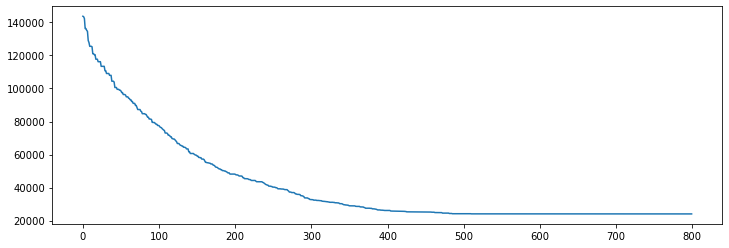

<Figure size 864x576 with 0 Axes>

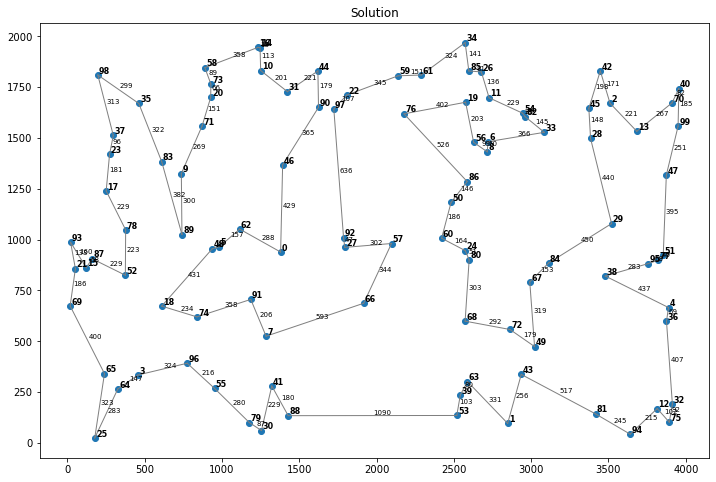

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 22709.253225543085 
 best_permutation: [14 16 58 73 20 71 35 98 37 23 17 78 93 21 69 15 87 52 65 25 64  3 18 74
 96 55 79 30 88 41  7 91  5 48 89 83  9 62  0 92 27 57 66 63 39 53  1 43
 49 72 68 80 24 60 50 86 67 84 38 81 94 12 75 32 36  4 51 77 95 29 47 99
 40 70 13  2 42 45 28 33 82 54  6  8 56 19 11 26 85 34 61 59 76 22 97 44
 90 46 31 10]


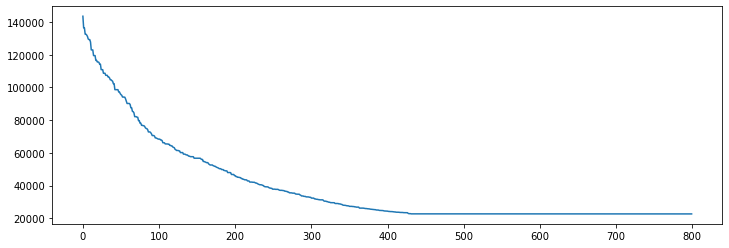

<Figure size 864x576 with 0 Axes>

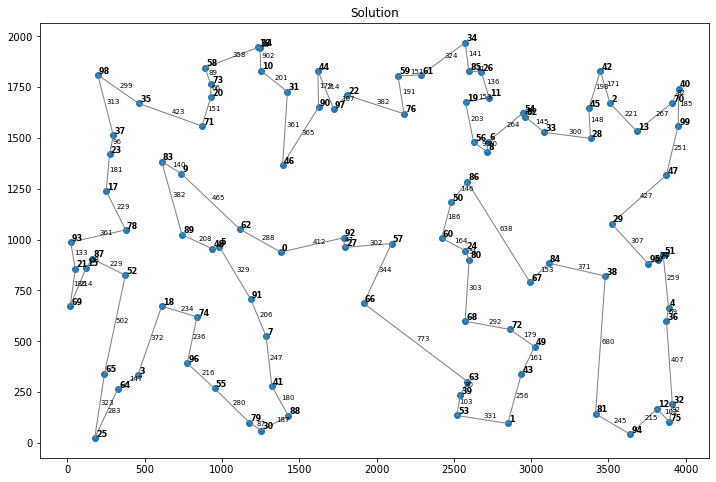

 population_size = 1000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 23280.914705999225 
 best_permutation: [36  4 95 38 84 29 77 51 47 99 40 70 13  2 42 45 28 33 82 54 11 26 34 85
 19 56  6  8 86 50 76 61 59 22 97 90 44 14 16 10 31 46 62 89 48  5  0 91
 74 18 52 83  9 71 20 73 58 35 98 37 23 17 78 87 15 93 21 69 65 25 64  3
 96 55 79 30 88 41  7 66 27 92 57 60 24 80 68 39 53 63 72 67 49 43  1 81
 94 12 75 32]


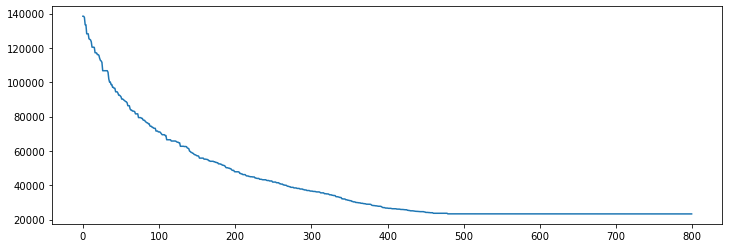

<Figure size 864x576 with 0 Axes>

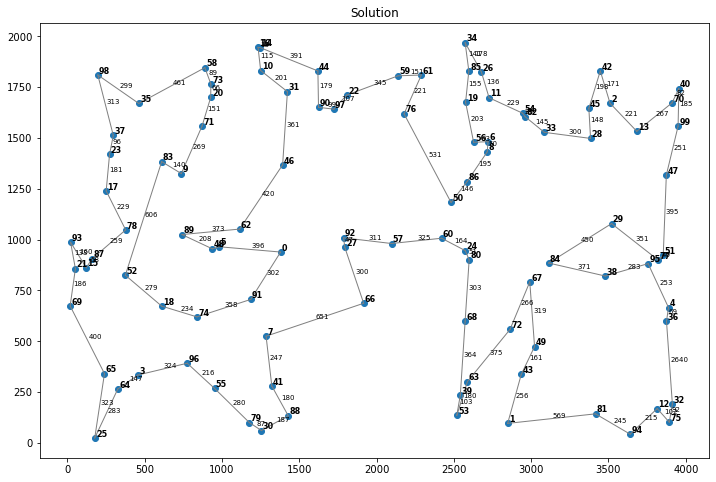

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.2 
 number_of_iterations = 800 
 tsp_objective_function: 23421.905809702894 
 best_permutation: [30 79 55 96 74  7 91  0 62  5 48  9 83 89 18  3 64 25 65 69 21 15 87 52
 78 93 17 23 37 98 35 71 20 73 58 16 14 10 31 46 90 44 97 22 76 59 61 19
 85 34 26 11 56  8  6 54 82 33 45 42  2 40 70 99 47 13 28 29 84 38 95 77
 51  4 36 32 75 12 94 81  1 53 39 63 68 72 43 49 67 80 24 86 50 60 57 92
 27 66 41 88]


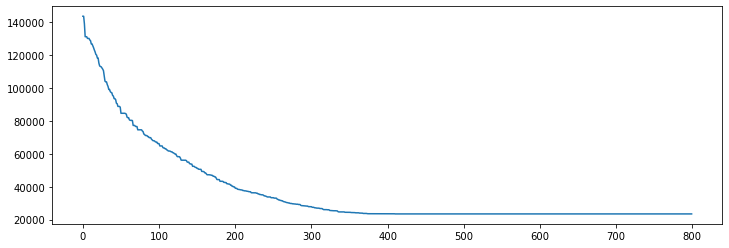

<Figure size 864x576 with 0 Axes>

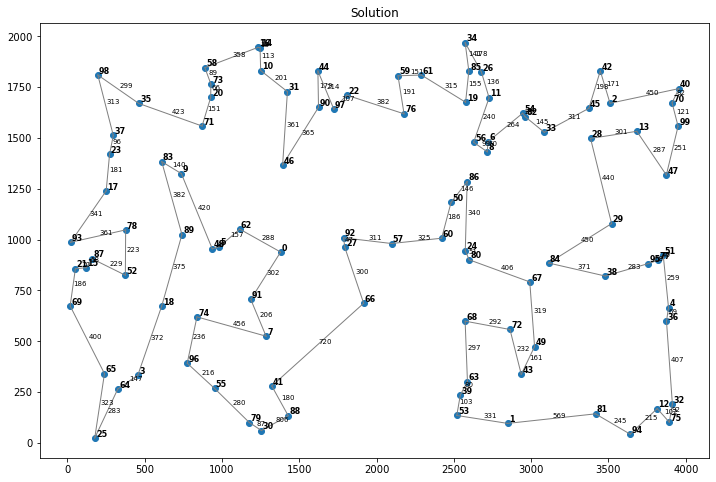

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.25 
 number_of_iterations = 800 
 tsp_objective_function: 23068.912082401825 
 best_permutation: [33 82 54 11 26 34 85 19 61 59 76 22 97 90 44 31 10 14 16 58 73 20 71  9
 83 35 98 37 23 17 78 52 87 15 93 21 69 65 25 64  3 18 89 48  5 62 46 92
 27  0 91  7 74 96 55 79 30 88 41 66 57 60 50 86 56  6  8 24 80 68 72 63
 39 53  1 43 49 67 84 38 81 94 12 75 32 36  4 95 77 51 47 99 70 40 42  2
 13 29 28 45]


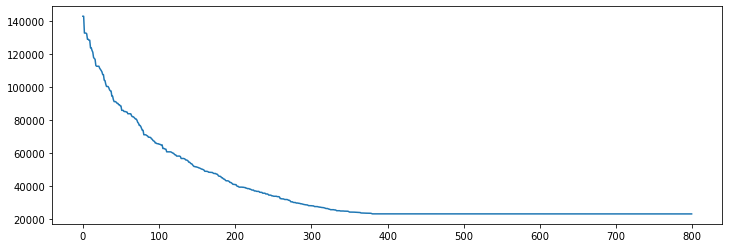

<Figure size 864x576 with 0 Axes>

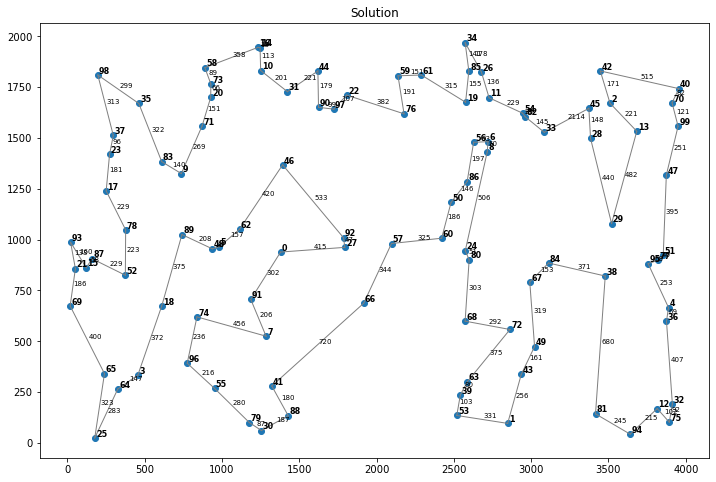

 population_size = 1000 
 crossover_probability = 0.85 
 mutation_probability = 0.3 
 number_of_iterations = 800 
 tsp_objective_function: 24041.083985020083 
 best_permutation: [74 96 55 79 30 88 41  7 91  0 27 92 76 19 11 54 82 33 45 28 29 38 84 67
  8  6 56 86 50 24 80 60 57 66 68 72 49 43 63 39 53  1 81 94 12 75 32 36
  4 95 77 51 47 99 40 70 13  2 42 26 85 34 61 59 22 97 44 90 46 31 10 14
 16 58 73 20 71 35 98 37 23 83  9 62  5 48 89 78 17 93 21 15 87 52 69 65
 25 64  3 18]


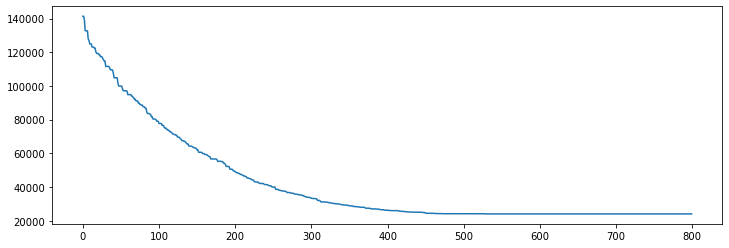

<Figure size 864x576 with 0 Axes>

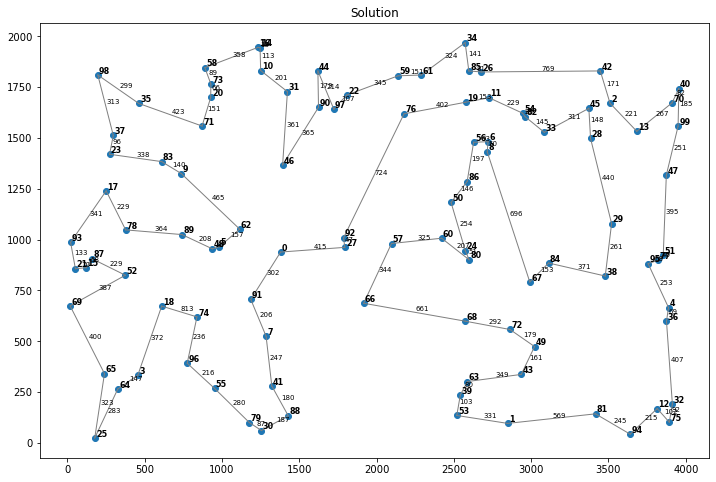

In [42]:
dist_matr = [kroA100_dist]
coords = kroA100_coords
num = [100]
pop_size = [1000]
cross_prob = [0.975, 0.95, 0.9, 0.85]
mut_prob = [0.2, 0.25, 0.3]
num_of_iter = [800]
crossover = [OBX]
mutation = [reverse_sequence_mutation]

for (n, d_matrix, pop, cross, mut, n_it, cro, mu) in itertools.product(num, dist_matr, 
                                            pop_size, cross_prob, mut_prob, num_of_iter, crossover, mutation):
    best_p, costs = SGA(n, d_matrix, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", tsp_objective_function(d_matrix, best_p), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    plot_path(d_matrix, coords, best_p)